In [2]:
import os
import re
from pathlib import Path
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy import signal
import argparse

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (107 kB/s)
Selecting previously unselected package tree.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [5]:
!tree /content/drive/MyDrive/IITG_assignments/internship

/content/drive/MyDrive/IITG_assignments/internship
├── Data
│   ├── AP01
│   │   ├── Flow - 30-05-2024.txt
│   │   ├── Flow Events - 30-05-2024.txt
│   │   ├── Sleep profile - 30-05-2024.txt
│   │   ├── SPO2 - 30-05-2024.txt
│   │   └── Thorac - 30-05-2024.txt
│   ├── AP02
│   │   ├── Flow  - 30.05.2024.txt
│   │   ├── Flow Events  - 30.05.2024.txt
│   │   ├── Sleep profile  - 30.05.2024.txt
│   │   ├── SPO2  - 30.05.2024.txt
│   │   └── Thorac  - 30.05.2024.txt
│   ├── AP03
│   │   ├── Flow - 29_05_2024.txt
│   │   ├── Flow Events - 29_05_2024.txt
│   │   ├── Sleep profile - 29_05_2024.txt
│   │   ├── SPO2 - 29_05_2024.txt
│   │   └── Thorac - 29_05_2024.txt
│   ├── AP04
│   │   ├── Flow Events - 29.05.2024.txt
│   │   ├── Flow Signal - 29.05.2024.txt
│   │   ├── Sleep profile - 29.05.2024.txt
│   │   ├── SPO2 Signal - 29.05.2024.txt
│   │   └── Thorac Signal - 29.05.2024.txt
│   └── AP05
│       ├── Flow Events - 28.05.2024.txt
│       ├── Flow Nasal - 28.05.2024.txt
│       ├── Slee

In [6]:
!cp -r "/content/drive/MyDrive/IITG_assignments/internship" "/content/"

In [7]:
!cp -r "/content/internship/Data" "/content/internship/Processed_Data"

In [8]:
!tree /content/internship/Processed_Data

/content/internship/Processed_Data
├── AP01
│   ├── Flow - 30-05-2024.txt
│   ├── Flow Events - 30-05-2024.txt
│   ├── Sleep profile - 30-05-2024.txt
│   ├── SPO2 - 30-05-2024.txt
│   └── Thorac - 30-05-2024.txt
├── AP02
│   ├── Flow  - 30.05.2024.txt
│   ├── Flow Events  - 30.05.2024.txt
│   ├── Sleep profile  - 30.05.2024.txt
│   ├── SPO2  - 30.05.2024.txt
│   └── Thorac  - 30.05.2024.txt
├── AP03
│   ├── Flow - 29_05_2024.txt
│   ├── Flow Events - 29_05_2024.txt
│   ├── Sleep profile - 29_05_2024.txt
│   ├── SPO2 - 29_05_2024.txt
│   └── Thorac - 29_05_2024.txt
├── AP04
│   ├── Flow Events - 29.05.2024.txt
│   ├── Flow Signal - 29.05.2024.txt
│   ├── Sleep profile - 29.05.2024.txt
│   ├── SPO2 Signal - 29.05.2024.txt
│   └── Thorac Signal - 29.05.2024.txt
└── AP05
    ├── Flow Events - 28.05.2024.txt
    ├── Flow Nasal - 28.05.2024.txt
    ├── Sleep profile - 28.05.2024.txt
    ├── SPO2 - 28.05.2024.txt
    └── Thorac Movement - 28.05.2024.txt

5 directories, 25 files


#remove date from the file naming

In [9]:
def remove_date_from_filename(root_dir):
    # Regex pattern to match common date formats: DD-MM-YYYY, DD.MM.YYYY, DD_MM_YYYY
    date_pattern = re.compile(r'\s*[-_ ]\s*\d{2}[-_.]\d{2}[-_.]\d{4}')

    for subdir, _, files in os.walk(root_dir):
        for file in files:
            original_path = os.path.join(subdir, file)
            new_name = re.sub(date_pattern, '', file).strip()
            new_path = os.path.join(subdir, new_name)

            if new_name != file:
                print(f'Renaming: {original_path} -> {new_path}')
                os.rename(original_path, new_path)

data_dir = "/content/internship/Processed_Data"
remove_date_from_filename(data_dir)

Renaming: /content/internship/Processed_Data/AP03/Flow - 29_05_2024.txt -> /content/internship/Processed_Data/AP03/Flow.txt
Renaming: /content/internship/Processed_Data/AP03/Thorac - 29_05_2024.txt -> /content/internship/Processed_Data/AP03/Thorac.txt
Renaming: /content/internship/Processed_Data/AP03/Sleep profile - 29_05_2024.txt -> /content/internship/Processed_Data/AP03/Sleep profile.txt
Renaming: /content/internship/Processed_Data/AP03/Flow Events - 29_05_2024.txt -> /content/internship/Processed_Data/AP03/Flow Events.txt
Renaming: /content/internship/Processed_Data/AP03/SPO2 - 29_05_2024.txt -> /content/internship/Processed_Data/AP03/SPO2.txt
Renaming: /content/internship/Processed_Data/AP05/Sleep profile - 28.05.2024.txt -> /content/internship/Processed_Data/AP05/Sleep profile.txt
Renaming: /content/internship/Processed_Data/AP05/Thorac Movement - 28.05.2024.txt -> /content/internship/Processed_Data/AP05/Thorac Movement.txt
Renaming: /content/internship/Processed_Data/AP05/Flow N

In [10]:
!tree /content/internship/Processed_Data

/content/internship/Processed_Data
├── AP01
│   ├── Flow Events.txt
│   ├── Flow.txt
│   ├── Sleep profile.txt
│   ├── SPO2.txt
│   └── Thorac.txt
├── AP02
│   ├── Flow Events.txt
│   ├── Flow.txt
│   ├── Sleep profile.txt
│   ├── SPO2.txt
│   └── Thorac.txt
├── AP03
│   ├── Flow Events.txt
│   ├── Flow.txt
│   ├── Sleep profile.txt
│   ├── SPO2.txt
│   └── Thorac.txt
├── AP04
│   ├── Flow Events.txt
│   ├── Flow Signal.txt
│   ├── Sleep profile.txt
│   ├── SPO2 Signal.txt
│   └── Thorac Signal.txt
└── AP05
    ├── Flow Events.txt
    ├── Flow Nasal.txt
    ├── Sleep profile.txt
    ├── SPO2.txt
    └── Thorac Movement.txt

5 directories, 25 files


#name normalisation

In [11]:
# Base directory
base_dir = "/content/internship/Processed_Data"

# Rename rules: mapping from source name (lowercase) to target filename
rename_rules = {
    "flow events.txt": "Flow_Events.txt",
    "sleep profile.txt": "Sleep_profile.txt",
    "flow signal.txt": "Flow.txt",
    "flow nasal.txt": "Flow.txt",
    "spo2 signal.txt": "SPO2.txt",
    "thorac signal.txt": "Thorac.txt",
    "thorac movement.txt": "Thorac.txt"
}

def standardize_filenames(base_dir):
    for participant in os.listdir(base_dir):
        part_path = os.path.join(base_dir, participant)
        if os.path.isdir(part_path):
            for fname in os.listdir(part_path):
                original_path = os.path.join(part_path, fname)
                fname_lower = fname.lower()
                if fname_lower in rename_rules:
                    new_name = rename_rules[fname_lower]
                    new_path = os.path.join(part_path, new_name)
                    if original_path != new_path:
                        print(f"Renaming: {original_path} -> {new_path}")
                        os.rename(original_path, new_path)

standardize_filenames(base_dir)


Renaming: /content/internship/Processed_Data/AP03/Sleep profile.txt -> /content/internship/Processed_Data/AP03/Sleep_profile.txt
Renaming: /content/internship/Processed_Data/AP03/Flow Events.txt -> /content/internship/Processed_Data/AP03/Flow_Events.txt
Renaming: /content/internship/Processed_Data/AP05/Flow Nasal.txt -> /content/internship/Processed_Data/AP05/Flow.txt
Renaming: /content/internship/Processed_Data/AP05/Sleep profile.txt -> /content/internship/Processed_Data/AP05/Sleep_profile.txt
Renaming: /content/internship/Processed_Data/AP05/Flow Events.txt -> /content/internship/Processed_Data/AP05/Flow_Events.txt
Renaming: /content/internship/Processed_Data/AP05/Thorac Movement.txt -> /content/internship/Processed_Data/AP05/Thorac.txt
Renaming: /content/internship/Processed_Data/AP04/Sleep profile.txt -> /content/internship/Processed_Data/AP04/Sleep_profile.txt
Renaming: /content/internship/Processed_Data/AP04/Flow Events.txt -> /content/internship/Processed_Data/AP04/Flow_Events.t

In [12]:
!tree /content/internship/Processed_Data

/content/internship/Processed_Data
├── AP01
│   ├── Flow_Events.txt
│   ├── Flow.txt
│   ├── Sleep_profile.txt
│   ├── SPO2.txt
│   └── Thorac.txt
├── AP02
│   ├── Flow_Events.txt
│   ├── Flow.txt
│   ├── Sleep_profile.txt
│   ├── SPO2.txt
│   └── Thorac.txt
├── AP03
│   ├── Flow_Events.txt
│   ├── Flow.txt
│   ├── Sleep_profile.txt
│   ├── SPO2.txt
│   └── Thorac.txt
├── AP04
│   ├── Flow_Events.txt
│   ├── Flow.txt
│   ├── Sleep_profile.txt
│   ├── SPO2.txt
│   └── Thorac.txt
└── AP05
    ├── Flow_Events.txt
    ├── Flow.txt
    ├── Sleep_profile.txt
    ├── SPO2.txt
    └── Thorac.txt

5 directories, 25 files


#Understanding the Data and Visualization [3 Marks]

In [13]:
def load_signal(filepath):
    """Loads time series signal after 'Data:' marker."""
    with open(filepath, 'r') as f:
        lines = f.readlines()

    data_start = next(i for i, line in enumerate(lines) if line.strip().lower().startswith("data:")) + 1
    timestamps, values = [], []

    for line in lines[data_start:]:
        try:
            t_str, val = line.strip().split(';')
            t = datetime.strptime(t_str.strip(), "%d.%m.%Y %H:%M:%S,%f")
            timestamps.append(t)
            values.append(float(val.strip()))
        except:
            continue

    df = pd.DataFrame({'time': timestamps, 'value': values})
    df.set_index('time', inplace=True)
    return df


In [14]:
def load_events(filepath):
    """Loads apnea/hypopnea events from Flow_Events.txt."""
    with open(filepath, 'r') as f:
        lines = f.readlines()

    events = []
    for line in lines:
        if '-' in line and ';' in line:
            try:
                time_range, _, label, _ = line.strip().split(';')
                start_str, end_str = time_range.split('-')
                start = datetime.strptime(start_str.strip(), "%d.%m.%Y %H:%M:%S,%f")
                end = datetime.strptime(end_str.strip(), "%d.%m.%Y %H:%M:%S,%f")
                events.append({'start': start, 'end': end, 'label': label.strip()})
            except:
                continue

    return pd.DataFrame(events)

In [15]:
def plot_signals(flow_df, thor_df, spo2_df, events_df, participant_id, out_pdf_path):
    """Plots 5-minute windows of signals with event overlays."""
    start_time = max(df.index.min() for df in [flow_df, thor_df, spo2_df])
    end_time = min(df.index.max() for df in [flow_df, thor_df, spo2_df])
    duration_sec = int((end_time - start_time).total_seconds())

    with PdfPages(out_pdf_path) as pdf:
        for offset in range(0, duration_sec, 300):  # 5-minute chunks
            win_start = start_time + timedelta(seconds=offset)
            win_end = win_start + timedelta(seconds=300)

            fig, axs = plt.subplots(3, 1, figsize=(12, 6), sharex=True)
            fig.suptitle(f"{participant_id} - {win_start.strftime('%H:%M:%S')} to {win_end.strftime('%H:%M:%S')}")

            axs[0].plot(flow_df[win_start:win_end].index, flow_df[win_start:win_end]["value"], label="Nasal Flow", color="blue")
            axs[0].set_ylabel("Flow")
            axs[0].legend()

            axs[1].plot(thor_df[win_start:win_end].index, thor_df[win_start:win_end]["value"], label="Thoracic", color="orange")
            axs[1].set_ylabel("Thorax")
            axs[1].legend()

            axs[2].plot(spo2_df[win_start:win_end].index, spo2_df[win_start:win_end]["value"], label="SpO₂", color="green")
            axs[2].set_ylabel("SpO₂ (%)")
            axs[2].set_xlabel("Time")
            axs[2].legend()

            for _, row in events_df.iterrows():
                if row['end'] < win_start or row['start'] > win_end:
                    continue
                for ax in axs:
                    color = 'red' if 'apnea' in row['label'].lower() else 'yellow'
                    ax.axvspan(row['start'], row['end'], color=color, alpha=0.3)

            plt.tight_layout()
            pdf.savefig()
            plt.close()



In [16]:

def run_visualization(participant_path):
    participant_id = os.path.basename(participant_path.strip("/"))
    base_dir = "/content/internship"

    def find_file(name):
        for f in os.listdir(participant_path):
            if name.lower() in f.lower():
                return os.path.join(participant_path, f)
        raise FileNotFoundError(f"{name} file not found in {participant_path}")

    flow_df = load_signal(find_file("Flow.txt"))
    thor_df = load_signal(find_file("Thorac.txt"))
    spo2_df = load_signal(find_file("SPO2.txt"))
    events_df = load_events(find_file("Flow_Events.txt"))

    out_pdf = os.path.join(base_dir, "Visualizations", f"{participant_id}_visualization.pdf")
    os.makedirs(os.path.dirname(out_pdf), exist_ok=True)
    plot_signals(flow_df, thor_df, spo2_df, events_df, participant_id, out_pdf)
    print(f"✅ Visualization saved to: {out_pdf}")




In [17]:
run_visualization("/content/internship/Processed_Data/AP01")

✅ Visualization saved to: /content/internship/Visualizations/AP01_visualization.pdf


In [18]:
run_visualization("/content/internship/Processed_Data/AP02")

✅ Visualization saved to: /content/internship/Visualizations/AP02_visualization.pdf


In [19]:
run_visualization("/content/internship/Processed_Data/AP03")

✅ Visualization saved to: /content/internship/Visualizations/AP03_visualization.pdf


In [20]:
run_visualization("/content/internship/Processed_Data/AP04")

✅ Visualization saved to: /content/internship/Visualizations/AP04_visualization.pdf


In [21]:
run_visualization("/content/internship/Processed_Data/AP05")

✅ Visualization saved to: /content/internship/Visualizations/AP05_visualization.pdf


#Data Cleaning [4 Marks]

#AP01 processing

In [22]:
def parse_and_convert_to_csv(folder_path):
    """
    Robust parser for sleep study data files with comprehensive error handling.
    Separates dates and times, handles all timestamp formats, and ensures clean output.
    """
    folder_path = Path(folder_path)

    if not folder_path.exists():
        print(f"Folder {folder_path} does not exist!")
        return

    print(f"Processing files in {folder_path}...")

    def parse_timestamp(timestamp_str, reference_date=None):
        """Flexible timestamp parser that handles both full and time-only formats"""
        try:
            # Try parsing as full timestamp (date + time)
            if ',' in timestamp_str:
                dt_part, ms_part = timestamp_str.split(',')
                dt_obj = datetime.strptime(dt_part, '%d.%m.%Y %H:%M:%S')
            else:
                dt_obj = datetime.strptime(timestamp_str, '%d.%m.%Y %H:%M:%S')
            return dt_obj.date(), dt_obj.time(), dt_obj, timestamp_str
        except ValueError:
            # If that fails, try parsing as time-only (for Flow_Events end times)
            try:
                time_part = timestamp_str.split(',')[0] if ',' in timestamp_str else timestamp_str
                time_obj = datetime.strptime(time_part, '%H:%M:%S').time()

                if reference_date:
                    # Combine with reference date from start time
                    dt_obj = datetime.combine(reference_date, time_obj)
                    return reference_date, time_obj, dt_obj, timestamp_str
                return None, time_obj, None, timestamp_str
            except ValueError as e:
                print(f"Could not parse timestamp {timestamp_str}: {str(e)}")
                return None, None, None, timestamp_str

    # Process each file in the folder
    for file in folder_path.glob('*.txt'):
        print(f"\nProcessing {file.name}...")

        try:
            # Read the file
            with open(file, 'r') as f:
                lines = f.readlines()

            # Skip metadata lines (those without date/time patterns)
            data_lines = [line.strip() for line in lines if re.search(r'(\d{2}\.\d{2}\.\d{4}|\d{2}:\d{2}:\d{2})', line)]

            # Determine the file type and parse accordingly
            if "Flow_Events" in file.name:
                # Parse Flow_Events.txt - event data with start-end times
                data = []
                for line in data_lines:
                    parts = line.split(';')
                    if len(parts) >= 3:
                        time_range = parts[0].strip()
                        duration = parts[1].strip()
                        event_type = parts[2].strip()
                        sleep_stage = parts[3].strip() if len(parts) > 3 else None

                        # Split time range into start and end times
                        start_time_str, end_time_str = time_range.split('-')

                        # Parse start time (has full date)
                        start_date, start_time, start_dt, start_orig = parse_timestamp(start_time_str.strip())

                        # Parse end time (time only - use date from start time)
                        _, end_time, end_dt, end_orig = parse_timestamp(end_time_str.strip(), start_date)

                        data.append({
                            'Start_Date': start_date,
                            'Start_Time': start_time,
                            'Start_DateTime': start_dt,
                            'End_Time': end_time,
                            'End_DateTime': end_dt,
                            'Duration_Seconds': duration,
                            'Event_Type': event_type,
                            'Sleep_Stage': sleep_stage,
                            'Original_Start': start_orig,
                            'Original_End': end_orig
                        })

                df = pd.DataFrame(data)

                # Clean up - remove any completely null columns
                df = df.dropna(axis=1, how='all')

            elif "Flow" in file.name and "Flow_Events" not in file.name:
                # Parse Flow.txt - time series data
                data = []
                for line in data_lines:
                    if ';' in line:
                        timestamp, value = line.split(';')
                        date, time_val, dt, orig = parse_timestamp(timestamp.strip())
                        data.append({
                            'Date': date,
                            'Time': time_val,
                            'DateTime': dt,
                            'Flow_Value': value.strip(),
                            'Original_Timestamp': orig
                        })

                df = pd.DataFrame(data)

            elif "Sleep_profile" in file.name:
                # Parse Sleep_profile.txt - sleep stage data
                data = []
                for line in data_lines:
                    if ';' in line:
                        timestamp, stage = line.split(';')
                        date, time_val, dt, orig = parse_timestamp(timestamp.strip())
                        data.append({
                            'Date': date,
                            'Time': time_val,
                            'DateTime': dt,
                            'Sleep_Stage': stage.strip(),
                            'Original_Timestamp': orig
                        })

                df = pd.DataFrame(data)

            elif "SPO2" in file.name:
                # Parse SPO2.txt - oxygen saturation data
                data = []
                for line in data_lines:
                    if ';' in line:
                        timestamp, value = line.split(';')
                        date, time_val, dt, orig = parse_timestamp(timestamp.strip())
                        data.append({
                            'Date': date,
                            'Time': time_val,
                            'DateTime': dt,
                            'SPO2_Value': value.strip(),
                            'Original_Timestamp': orig
                        })

                df = pd.DataFrame(data)

            elif "Thorac" in file.name:
                # Parse Thorac.txt - thoracic movement data
                data = []
                for line in data_lines:
                    if ';' in line:
                        timestamp, value = line.split(';')
                        date, time_val, dt, orig = parse_timestamp(timestamp.strip())
                        data.append({
                            'Date': date,
                            'Time': time_val,
                            'DateTime': dt,
                            'Thoracic_Value': value.strip(),
                            'Original_Timestamp': orig
                        })

                df = pd.DataFrame(data)
            else:
                print(f"Unknown file type: {file.name}")
                continue

            # Convert numeric columns where appropriate
            numeric_cols = ['Flow_Value', 'SPO2_Value', 'Thoracic_Value', 'Duration_Seconds']
            for col in numeric_cols:
                if col in df.columns:
                    df[col] = pd.to_numeric(df[col], errors='coerce')

            # Create CSV file
            csv_file = file.with_suffix('.csv')
            df.to_csv(csv_file, index=False)
            print(f"Successfully created {csv_file}")

            # Display summary
            print("\nData summary:")
            print(f"Rows: {len(df)}")
            print(f"Columns: {len(df.columns)}")
            print("Column types:")
            print(df.dtypes)
            print("\nSample data:")
            print(df.head())

        except Exception as e:
            print(f"Error processing {file.name}: {str(e)}")
            import traceback
            traceback.print_exc()

ap01_folder_path = "/content/internship/Processed_Data/AP01"
parse_and_convert_to_csv(ap01_folder_path)

Processing files in /content/internship/Processed_Data/AP01...

Processing Sleep_profile.txt...
Successfully created /content/internship/Processed_Data/AP01/Sleep_profile.csv

Data summary:
Rows: 912
Columns: 5
Column types:
Date                          object
Time                          object
DateTime              datetime64[ns]
Sleep_Stage                   object
Original_Timestamp            object
dtype: object

Sample data:
         Date      Time            DateTime Sleep_Stage  \
0  2024-05-30  20:59:00 2024-05-30 20:59:00        Wake   
1  2024-05-30  20:59:30 2024-05-30 20:59:30        Wake   
2  2024-05-30  21:00:00 2024-05-30 21:00:00        Wake   
3  2024-05-30  21:00:30 2024-05-30 21:00:30        Wake   
4  2024-05-30  21:01:00 2024-05-30 21:01:00        Wake   

        Original_Timestamp  
0  30.05.2024 20:59:00,000  
1  30.05.2024 20:59:30,000  
2  30.05.2024 21:00:00,000  
3  30.05.2024 21:00:30,000  
4  30.05.2024 21:01:00,000  

Processing SPO2.txt...
Successfu

#Data Cleaning

Cleaning files in /content/internship/Processed_Data/AP01...
Filtered files will be saved to: /content/internship/Processed_Data/AP01

Processing Flow.csv...
Using default 32Hz sampling rate
Saved filtered data to /content/internship/Processed_Data/AP01/filtered_Flow.csv
Original - Mean: -2.76, Std: 56.89
Filtered - Mean: -2.76, Std: 52.66


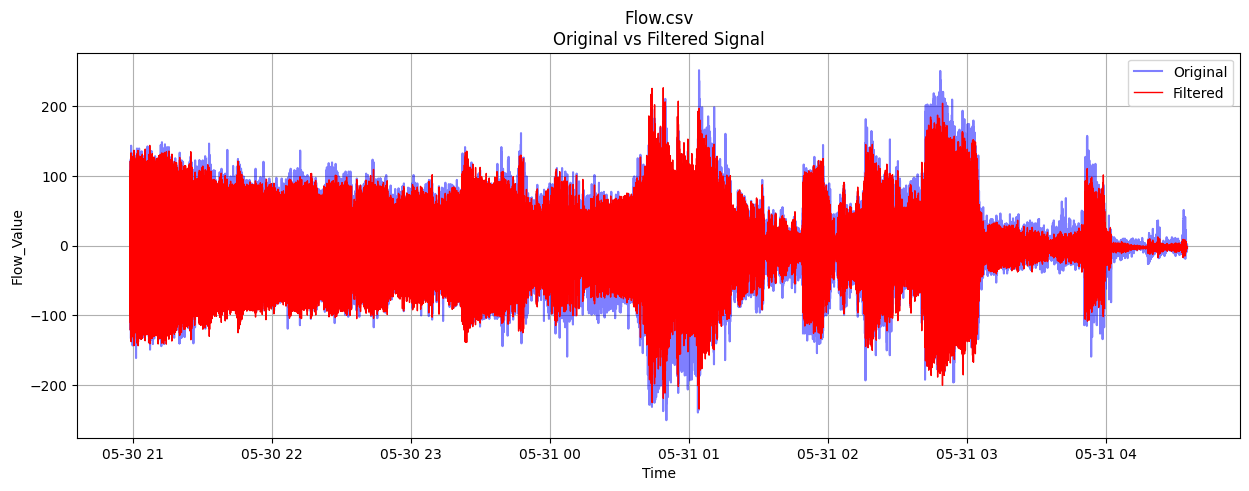

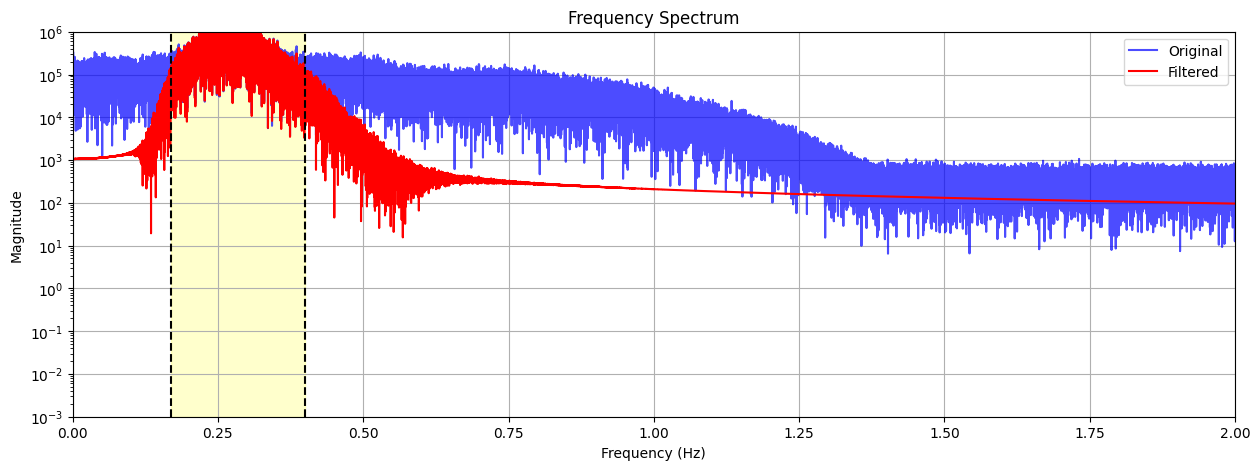


Processing Flow_Events.csv...
Skipping Flow_Events.csv - not a time series signal file

Processing SPO2.csv...
Using default 32Hz sampling rate
Saved filtered data to /content/internship/Processed_Data/AP01/filtered_SPO2.csv
Original - Mean: 94.65, Std: 1.31
Filtered - Mean: 94.65, Std: 1.17


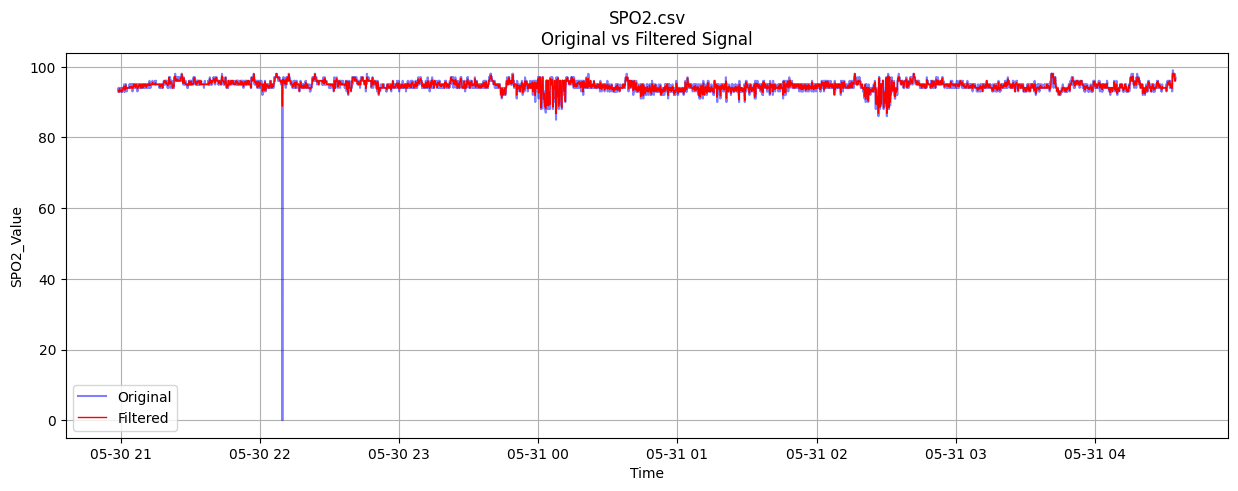


Processing Sleep_profile.csv...
Skipping Sleep_profile.csv - not a time series signal file

Processing Thorac.csv...
Using default 32Hz sampling rate
Saved filtered data to /content/internship/Processed_Data/AP01/filtered_Thorac.csv
Original - Mean: 0.90, Std: 40.01
Filtered - Mean: 0.90, Std: 33.88


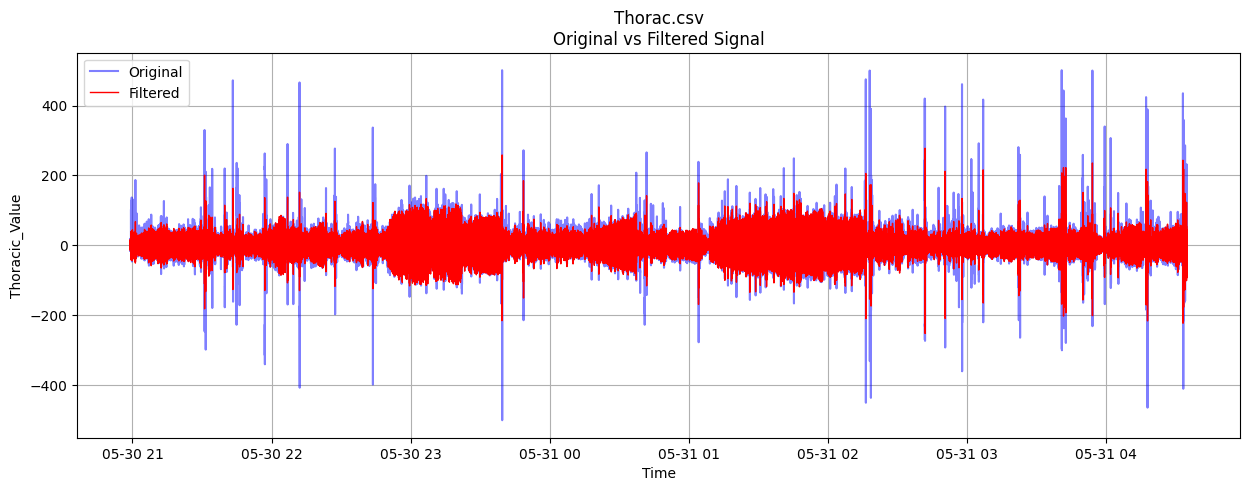

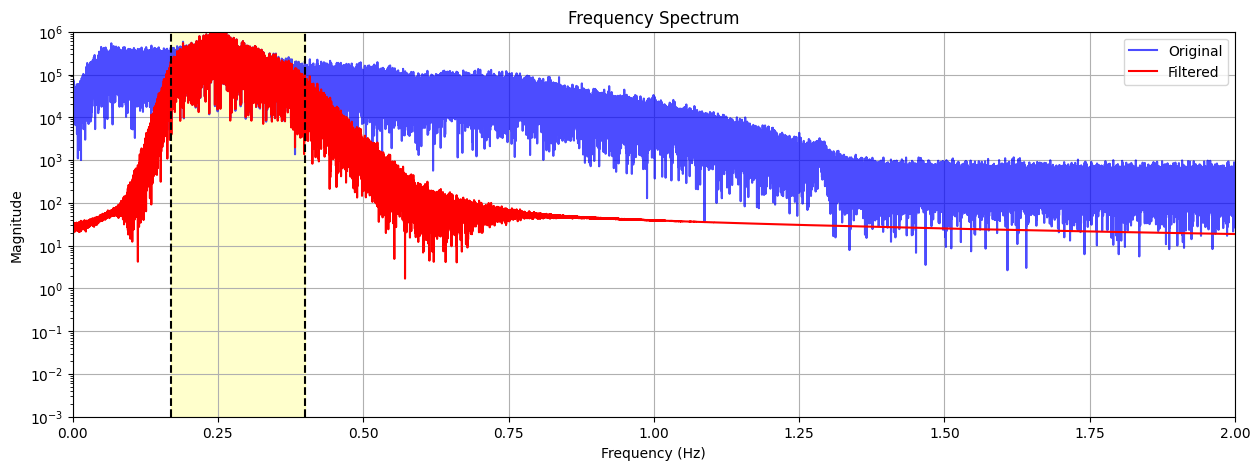

In [23]:
def clean_sleep_data(folder_path, show_plots=True):
    """
    Enhanced sleep study data cleaner with:
    - DC offset preservation
    - Signal-specific filtering
    - Output to filtered_data folder
    - Better timestamp handling
    """
    folder_path = Path(folder_path)

    if not folder_path.exists():
        print(f"Folder {folder_path} does not exist!")
        return

    # Create filtered_data directory if it doesn't exist
    filtered_dir = folder_path.parent / "AP01"
    filtered_dir.mkdir(exist_ok=True)

    print(f"Cleaning files in {folder_path}...")
    print(f"Filtered files will be saved to: {filtered_dir}")

    # Process each CSV file in the folder
    for csv_file in folder_path.glob('*.csv'):
        print(f"\nProcessing {csv_file.name}...")

        try:
            # Skip non-signal files
            if "Sleep_profile" in csv_file.name or "Flow_Events" in csv_file.name:
                print(f"Skipping {csv_file.name} - not a time series signal file")
                continue

            df = pd.read_csv(csv_file)

            # Handle timestamps - multiple fallback options
            if 'DateTime' in df.columns:
                df['DateTime'] = pd.to_datetime(df['DateTime'])
            elif 'Original_Timestamp' in df.columns:
                df['DateTime'] = pd.to_datetime(df['Original_Timestamp'],
                                              format='%d.%m.%Y %H:%M:%S,%f')
            elif 'Date' in df.columns and 'Time' in df.columns:
                df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
            else:
                print("No usable timestamp column found - skipping")
                continue

            # Get signal column
            signal_col = next((col for col in ['Flow_Value', 'SPO2_Value', 'Thoracic_Value']
                             if col in df.columns), None)

            if not signal_col:
                print("No signal data found - skipping")
                continue

            # Calculate sampling rate
            time_diffs = df['DateTime'].diff().dt.total_seconds().dropna()
            if len(time_diffs) == 0 or time_diffs.median() <= 0:
                fs = 32.0  # Default from file headers
                print("Using default 32Hz sampling rate")
            else:
                fs = 1 / time_diffs.median()
                print(f"Calculated sampling rate: {fs:.2f} Hz")

            # Signal-specific processing
            signal_data = df[signal_col].values
            dc_offset = np.mean(signal_data)

            if signal_col == 'SPO2_Value':
                # Gentle lowpass filtering for SPO2 (preserve trends)
                cutoff = 0.5  # Hz
                b, a = signal.butter(2, cutoff/(fs/2), btype='low')
                filtered = signal.filtfilt(b, a, signal_data - dc_offset) + dc_offset
            else:
                # Bandpass for respiratory signals
                low = 0.17  # 10 breaths/min
                high = 0.4   # 24 breaths/min
                b, a = signal.butter(4, [low/(fs/2), high/(fs/2)], btype='band')
                filtered = signal.filtfilt(b, a, signal_data - dc_offset) + dc_offset

            # Add filtered column
            df[f'Filtered_{signal_col}'] = filtered

            # Create new filename with prefix
            filtered_filename = f"filtered_{csv_file.stem}.csv"
            filtered_path = filtered_dir / filtered_filename

            # Save to new CSV in filtered_data folder
            df.to_csv(filtered_path, index=False)
            print(f"Saved filtered data to {filtered_path}")

            # Statistics
            print(f"Original - Mean: {dc_offset:.2f}, Std: {np.std(signal_data):.2f}")
            print(f"Filtered - Mean: {np.mean(filtered):.2f}, Std: {np.std(filtered):.2f}")

            if show_plots:
                # Time domain plot
                plt.figure(figsize=(15, 5))
                plt.plot(df['DateTime'], signal_data, 'b-', alpha=0.5, label='Original')
                plt.plot(df['DateTime'], filtered, 'r-', linewidth=1, label='Filtered')
                plt.title(f"{csv_file.name}\nOriginal vs Filtered Signal")
                plt.xlabel('Time')
                plt.ylabel(signal_col)
                plt.legend()
                plt.grid()
                plt.show()

                # Frequency domain plot (if filtered)
                if signal_col != 'SPO2_Value':
                    plt.figure(figsize=(15, 5))
                    n = len(signal_data)
                    freqs = np.fft.fftfreq(n, d=1/fs)[:n//2]

                    fft_orig = np.abs(np.fft.fft(signal_data)[:n//2])
                    fft_filt = np.abs(np.fft.fft(filtered)[:n//2])

                    plt.semilogy(freqs, fft_orig, 'b-', alpha=0.7, label='Original')
                    plt.semilogy(freqs, fft_filt, 'r-', label='Filtered')

                    # Mark breathing frequency range
                    plt.axvline(0.17, color='k', linestyle='--')
                    plt.axvline(0.4, color='k', linestyle='--')
                    plt.fill_betweenx([1e-3, 1e6], 0.17, 0.4, color='yellow', alpha=0.2)

                    plt.title("Frequency Spectrum")
                    plt.xlabel('Frequency (Hz)')
                    plt.ylabel('Magnitude')
                    plt.xlim(0, min(2, fs/2))
                    plt.ylim(1e-3, 1e6)
                    plt.legend()
                    plt.grid()
                    plt.show()

        except Exception as e:
            print(f"Error processing {csv_file.name}: {str(e)}")
            import traceback
            traceback.print_exc()

ap01_folder_path = "/content/internship/Processed_Data/AP01"
clean_sleep_data(ap01_folder_path, show_plots=True)

#AP02 processing


In [24]:
def parse_and_convert_to_csv(folder_path):
    """
    Robust parser for sleep study data files with comprehensive error handling.
    Separates dates and times, handles all timestamp formats, and ensures clean output.
    """
    folder_path = Path(folder_path)

    if not folder_path.exists():
        print(f"Folder {folder_path} does not exist!")
        return

    print(f"Processing files in {folder_path}...")

    def parse_timestamp(timestamp_str, reference_date=None):
        """Flexible timestamp parser that handles both full and time-only formats"""
        try:
            # Try parsing as full timestamp (date + time)
            if ',' in timestamp_str:
                dt_part, ms_part = timestamp_str.split(',')
                dt_obj = datetime.strptime(dt_part, '%d.%m.%Y %H:%M:%S')
            else:
                dt_obj = datetime.strptime(timestamp_str, '%d.%m.%Y %H:%M:%S')
            return dt_obj.date(), dt_obj.time(), dt_obj, timestamp_str
        except ValueError:
            # If that fails, try parsing as time-only (for Flow_Events end times)
            try:
                time_part = timestamp_str.split(',')[0] if ',' in timestamp_str else timestamp_str
                time_obj = datetime.strptime(time_part, '%H:%M:%S').time()

                if reference_date:
                    # Combine with reference date from start time
                    dt_obj = datetime.combine(reference_date, time_obj)
                    return reference_date, time_obj, dt_obj, timestamp_str
                return None, time_obj, None, timestamp_str
            except ValueError as e:
                print(f"Could not parse timestamp {timestamp_str}: {str(e)}")
                return None, None, None, timestamp_str

    # Process each file in the folder
    for file in folder_path.glob('*.txt'):
        print(f"\nProcessing {file.name}...")

        try:
            # Read the file
            with open(file, 'r') as f:
                lines = f.readlines()

            # Skip metadata lines (those without date/time patterns)
            data_lines = [line.strip() for line in lines if re.search(r'(\d{2}\.\d{2}\.\d{4}|\d{2}:\d{2}:\d{2})', line)]

            # Determine the file type and parse accordingly
            if "Flow_Events" in file.name:
                # Parse Flow_Events.txt - event data with start-end times
                data = []
                for line in data_lines:
                    parts = line.split(';')
                    if len(parts) >= 3:
                        time_range = parts[0].strip()
                        duration = parts[1].strip()
                        event_type = parts[2].strip()
                        sleep_stage = parts[3].strip() if len(parts) > 3 else None

                        # Split time range into start and end times
                        start_time_str, end_time_str = time_range.split('-')

                        # Parse start time (has full date)
                        start_date, start_time, start_dt, start_orig = parse_timestamp(start_time_str.strip())

                        # Parse end time (time only - use date from start time)
                        _, end_time, end_dt, end_orig = parse_timestamp(end_time_str.strip(), start_date)

                        data.append({
                            'Start_Date': start_date,
                            'Start_Time': start_time,
                            'Start_DateTime': start_dt,
                            'End_Time': end_time,
                            'End_DateTime': end_dt,
                            'Duration_Seconds': duration,
                            'Event_Type': event_type,
                            'Sleep_Stage': sleep_stage,
                            'Original_Start': start_orig,
                            'Original_End': end_orig
                        })

                df = pd.DataFrame(data)

                # Clean up - remove any completely null columns
                df = df.dropna(axis=1, how='all')

            elif "Flow" in file.name and "Flow_Events" not in file.name:
                # Parse Flow.txt - time series data
                data = []
                for line in data_lines:
                    if ';' in line:
                        timestamp, value = line.split(';')
                        date, time_val, dt, orig = parse_timestamp(timestamp.strip())
                        data.append({
                            'Date': date,
                            'Time': time_val,
                            'DateTime': dt,
                            'Flow_Value': value.strip(),
                            'Original_Timestamp': orig
                        })

                df = pd.DataFrame(data)

            elif "Sleep_profile" in file.name:
                # Parse Sleep_profile.txt - sleep stage data
                data = []
                for line in data_lines:
                    if ';' in line:
                        timestamp, stage = line.split(';')
                        date, time_val, dt, orig = parse_timestamp(timestamp.strip())
                        data.append({
                            'Date': date,
                            'Time': time_val,
                            'DateTime': dt,
                            'Sleep_Stage': stage.strip(),
                            'Original_Timestamp': orig
                        })

                df = pd.DataFrame(data)

            elif "SPO2" in file.name:
                # Parse SPO2.txt - oxygen saturation data
                data = []
                for line in data_lines:
                    if ';' in line:
                        timestamp, value = line.split(';')
                        date, time_val, dt, orig = parse_timestamp(timestamp.strip())
                        data.append({
                            'Date': date,
                            'Time': time_val,
                            'DateTime': dt,
                            'SPO2_Value': value.strip(),
                            'Original_Timestamp': orig
                        })

                df = pd.DataFrame(data)

            elif "Thorac" in file.name:
                # Parse Thorac.txt - thoracic movement data
                data = []
                for line in data_lines:
                    if ';' in line:
                        timestamp, value = line.split(';')
                        date, time_val, dt, orig = parse_timestamp(timestamp.strip())
                        data.append({
                            'Date': date,
                            'Time': time_val,
                            'DateTime': dt,
                            'Thoracic_Value': value.strip(),
                            'Original_Timestamp': orig
                        })

                df = pd.DataFrame(data)
            else:
                print(f"Unknown file type: {file.name}")
                continue

            # Convert numeric columns where appropriate
            numeric_cols = ['Flow_Value', 'SPO2_Value', 'Thoracic_Value', 'Duration_Seconds']
            for col in numeric_cols:
                if col in df.columns:
                    df[col] = pd.to_numeric(df[col], errors='coerce')

            # Create CSV file
            csv_file = file.with_suffix('.csv')
            df.to_csv(csv_file, index=False)
            print(f"Successfully created {csv_file}")

            # Display summary
            print("\nData summary:")
            print(f"Rows: {len(df)}")
            print(f"Columns: {len(df.columns)}")
            print("Column types:")
            print(df.dtypes)
            print("\nSample data:")
            print(df.head())

        except Exception as e:
            print(f"Error processing {file.name}: {str(e)}")
            import traceback
            traceback.print_exc()

ap02_folder_path = "/content/internship/Processed_Data/AP02"
parse_and_convert_to_csv(ap02_folder_path)

Processing files in /content/internship/Processed_Data/AP02...

Processing Sleep_profile.txt...
Successfully created /content/internship/Processed_Data/AP02/Sleep_profile.csv

Data summary:
Rows: 886
Columns: 5
Column types:
Date                          object
Time                          object
DateTime              datetime64[ns]
Sleep_Stage                   object
Original_Timestamp            object
dtype: object

Sample data:
         Date      Time            DateTime Sleep_Stage  \
0  2024-05-30  21:22:30 2024-05-30 21:22:30           A   
1  2024-05-30  21:23:00 2024-05-30 21:23:00        Wake   
2  2024-05-30  21:23:30 2024-05-30 21:23:30        Wake   
3  2024-05-30  21:24:00 2024-05-30 21:24:00        Wake   
4  2024-05-30  21:24:30 2024-05-30 21:24:30        Wake   

        Original_Timestamp  
0  30.05.2024 21:22:30,000  
1  30.05.2024 21:23:00,000  
2  30.05.2024 21:23:30,000  
3  30.05.2024 21:24:00,000  
4  30.05.2024 21:24:30,000  

Processing SPO2.txt...
Successfu

Cleaning files in /content/internship/Processed_Data/AP02...
Filtered files will be saved to: /content/internship/Processed_Data/AP02

Processing Flow.csv...
Using default 32Hz sampling rate
Saved filtered data to /content/internship/Processed_Data/AP02/filtered_Flow.csv
Original - Mean: -0.35, Std: 70.25
Filtered - Mean: -0.35, Std: 50.39


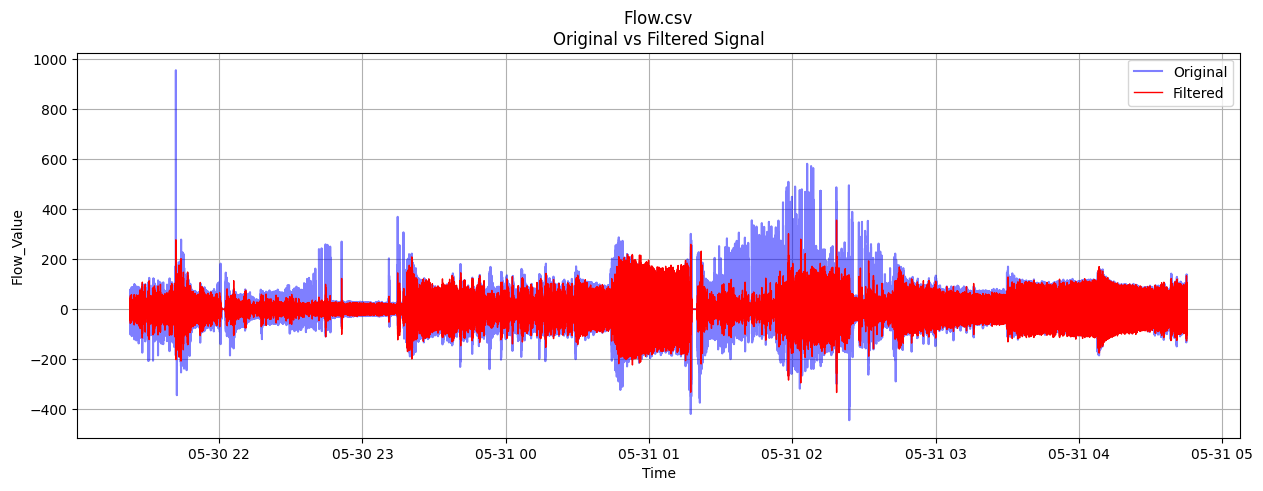

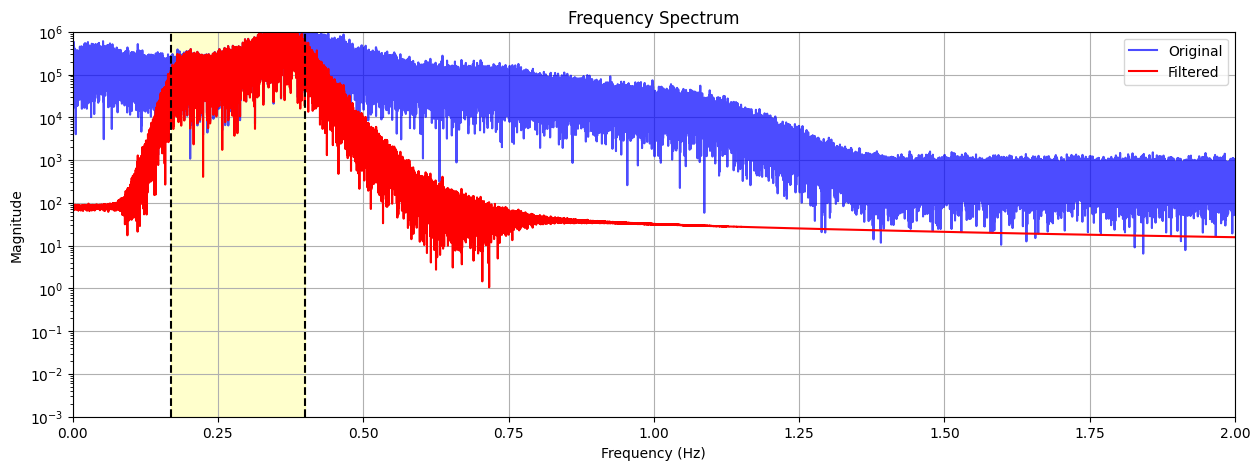


Processing Flow_Events.csv...
Skipping Flow_Events.csv - not a time series signal file

Processing SPO2.csv...
Using default 32Hz sampling rate
Saved filtered data to /content/internship/Processed_Data/AP02/filtered_SPO2.csv
Original - Mean: 93.58, Std: 10.61
Filtered - Mean: 93.58, Std: 10.29


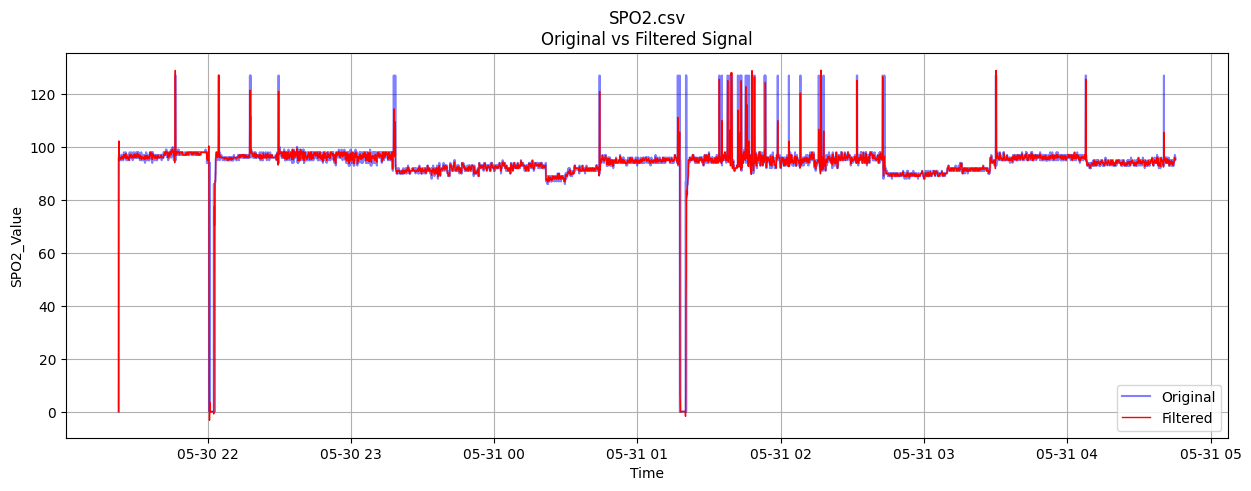


Processing Sleep_profile.csv...
Skipping Sleep_profile.csv - not a time series signal file

Processing Thorac.csv...
Using default 32Hz sampling rate
Saved filtered data to /content/internship/Processed_Data/AP02/filtered_Thorac.csv
Original - Mean: 1.92, Std: 141.35
Filtered - Mean: 1.92, Std: 98.79


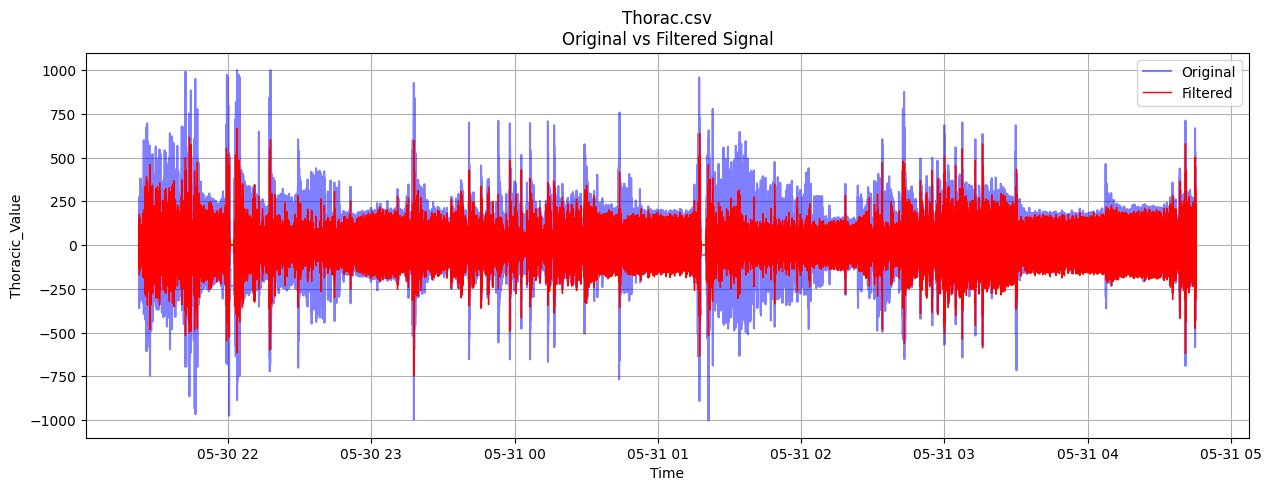

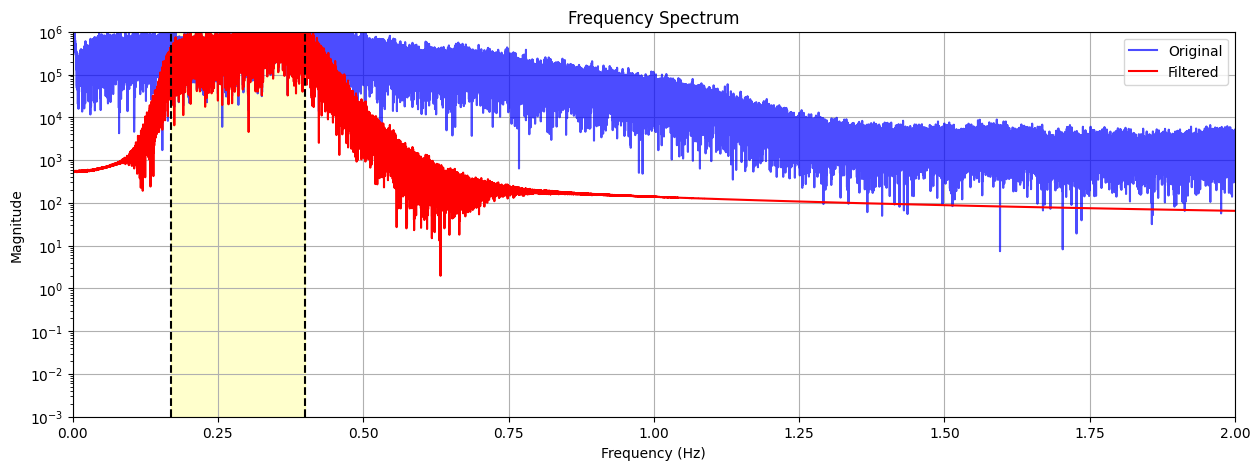

In [25]:
def clean_sleep_data(folder_path, show_plots=True):
    """
    Enhanced sleep study data cleaner with:
    - DC offset preservation
    - Signal-specific filtering
    - Output to filtered_data folder
    - Better timestamp handling
    """
    folder_path = Path(folder_path)

    if not folder_path.exists():
        print(f"Folder {folder_path} does not exist!")
        return

    # Create filtered_data directory if it doesn't exist
    filtered_dir = folder_path.parent / "AP02"
    filtered_dir.mkdir(exist_ok=True)

    print(f"Cleaning files in {folder_path}...")
    print(f"Filtered files will be saved to: {filtered_dir}")

    # Process each CSV file in the folder
    for csv_file in folder_path.glob('*.csv'):
        print(f"\nProcessing {csv_file.name}...")

        try:
            # Skip non-signal files
            if "Sleep_profile" in csv_file.name or "Flow_Events" in csv_file.name:
                print(f"Skipping {csv_file.name} - not a time series signal file")
                continue

            df = pd.read_csv(csv_file)

            # Handle timestamps - multiple fallback options
            if 'DateTime' in df.columns:
                df['DateTime'] = pd.to_datetime(df['DateTime'])
            elif 'Original_Timestamp' in df.columns:
                df['DateTime'] = pd.to_datetime(df['Original_Timestamp'],
                                              format='%d.%m.%Y %H:%M:%S,%f')
            elif 'Date' in df.columns and 'Time' in df.columns:
                df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
            else:
                print("No usable timestamp column found - skipping")
                continue

            # Get signal column
            signal_col = next((col for col in ['Flow_Value', 'SPO2_Value', 'Thoracic_Value']
                             if col in df.columns), None)

            if not signal_col:
                print("No signal data found - skipping")
                continue

            # Calculate sampling rate
            time_diffs = df['DateTime'].diff().dt.total_seconds().dropna()
            if len(time_diffs) == 0 or time_diffs.median() <= 0:
                fs = 32.0  # Default from file headers
                print("Using default 32Hz sampling rate")
            else:
                fs = 1 / time_diffs.median()
                print(f"Calculated sampling rate: {fs:.2f} Hz")

            # Signal-specific processing
            signal_data = df[signal_col].values
            dc_offset = np.mean(signal_data)

            if signal_col == 'SPO2_Value':
                # Gentle lowpass filtering for SPO2 (preserve trends)
                cutoff = 0.5  # Hz
                b, a = signal.butter(2, cutoff/(fs/2), btype='low')
                filtered = signal.filtfilt(b, a, signal_data - dc_offset) + dc_offset
            else:
                # Bandpass for respiratory signals
                low = 0.17  # 10 breaths/min
                high = 0.4   # 24 breaths/min
                b, a = signal.butter(4, [low/(fs/2), high/(fs/2)], btype='band')
                filtered = signal.filtfilt(b, a, signal_data - dc_offset) + dc_offset

            # Add filtered column
            df[f'Filtered_{signal_col}'] = filtered

            # Create new filename with prefix
            filtered_filename = f"filtered_{csv_file.stem}.csv"
            filtered_path = filtered_dir / filtered_filename

            # Save to new CSV in filtered_data folder
            df.to_csv(filtered_path, index=False)
            print(f"Saved filtered data to {filtered_path}")

            # Statistics
            print(f"Original - Mean: {dc_offset:.2f}, Std: {np.std(signal_data):.2f}")
            print(f"Filtered - Mean: {np.mean(filtered):.2f}, Std: {np.std(filtered):.2f}")

            if show_plots:
                # Time domain plot
                plt.figure(figsize=(15, 5))
                plt.plot(df['DateTime'], signal_data, 'b-', alpha=0.5, label='Original')
                plt.plot(df['DateTime'], filtered, 'r-', linewidth=1, label='Filtered')
                plt.title(f"{csv_file.name}\nOriginal vs Filtered Signal")
                plt.xlabel('Time')
                plt.ylabel(signal_col)
                plt.legend()
                plt.grid()
                plt.show()

                # Frequency domain plot (if filtered)
                if signal_col != 'SPO2_Value':
                    plt.figure(figsize=(15, 5))
                    n = len(signal_data)
                    freqs = np.fft.fftfreq(n, d=1/fs)[:n//2]

                    fft_orig = np.abs(np.fft.fft(signal_data)[:n//2])
                    fft_filt = np.abs(np.fft.fft(filtered)[:n//2])

                    plt.semilogy(freqs, fft_orig, 'b-', alpha=0.7, label='Original')
                    plt.semilogy(freqs, fft_filt, 'r-', label='Filtered')

                    # Mark breathing frequency range
                    plt.axvline(0.17, color='k', linestyle='--')
                    plt.axvline(0.4, color='k', linestyle='--')
                    plt.fill_betweenx([1e-3, 1e6], 0.17, 0.4, color='yellow', alpha=0.2)

                    plt.title("Frequency Spectrum")
                    plt.xlabel('Frequency (Hz)')
                    plt.ylabel('Magnitude')
                    plt.xlim(0, min(2, fs/2))
                    plt.ylim(1e-3, 1e6)
                    plt.legend()
                    plt.grid()
                    plt.show()

        except Exception as e:
            print(f"Error processing {csv_file.name}: {str(e)}")
            import traceback
            traceback.print_exc()

ap02_folder_path = "/content/internship/Processed_Data/AP02"
clean_sleep_data(ap02_folder_path, show_plots=True)

#AP03 processsing

In [26]:
def parse_and_convert_to_csv(folder_path):
    """
    Robust parser for sleep study data files with comprehensive error handling.
    Separates dates and times, handles all timestamp formats, and ensures clean output.
    """
    folder_path = Path(folder_path)

    if not folder_path.exists():
        print(f"Folder {folder_path} does not exist!")
        return

    print(f"Processing files in {folder_path}...")

    def parse_timestamp(timestamp_str, reference_date=None):
        """Flexible timestamp parser that handles both full and time-only formats"""
        try:
            # Try parsing as full timestamp (date + time)
            if ',' in timestamp_str:
                dt_part, ms_part = timestamp_str.split(',')
                dt_obj = datetime.strptime(dt_part, '%d.%m.%Y %H:%M:%S')
            else:
                dt_obj = datetime.strptime(timestamp_str, '%d.%m.%Y %H:%M:%S')
            return dt_obj.date(), dt_obj.time(), dt_obj, timestamp_str
        except ValueError:
            # If that fails, try parsing as time-only (for Flow_Events end times)
            try:
                time_part = timestamp_str.split(',')[0] if ',' in timestamp_str else timestamp_str
                time_obj = datetime.strptime(time_part, '%H:%M:%S').time()

                if reference_date:
                    # Combine with reference date from start time
                    dt_obj = datetime.combine(reference_date, time_obj)
                    return reference_date, time_obj, dt_obj, timestamp_str
                return None, time_obj, None, timestamp_str
            except ValueError as e:
                print(f"Could not parse timestamp {timestamp_str}: {str(e)}")
                return None, None, None, timestamp_str

    # Process each file in the folder
    for file in folder_path.glob('*.txt'):
        print(f"\nProcessing {file.name}...")

        try:
            # Read the file
            with open(file, 'r') as f:
                lines = f.readlines()

            # Skip metadata lines (those without date/time patterns)
            data_lines = [line.strip() for line in lines if re.search(r'(\d{2}\.\d{2}\.\d{4}|\d{2}:\d{2}:\d{2})', line)]

            # Determine the file type and parse accordingly
            if "Flow_Events" in file.name:
                # Parse Flow_Events.txt - event data with start-end times
                data = []
                for line in data_lines:
                    parts = line.split(';')
                    if len(parts) >= 3:
                        time_range = parts[0].strip()
                        duration = parts[1].strip()
                        event_type = parts[2].strip()
                        sleep_stage = parts[3].strip() if len(parts) > 3 else None

                        # Split time range into start and end times
                        start_time_str, end_time_str = time_range.split('-')

                        # Parse start time (has full date)
                        start_date, start_time, start_dt, start_orig = parse_timestamp(start_time_str.strip())

                        # Parse end time (time only - use date from start time)
                        _, end_time, end_dt, end_orig = parse_timestamp(end_time_str.strip(), start_date)

                        data.append({
                            'Start_Date': start_date,
                            'Start_Time': start_time,
                            'Start_DateTime': start_dt,
                            'End_Time': end_time,
                            'End_DateTime': end_dt,
                            'Duration_Seconds': duration,
                            'Event_Type': event_type,
                            'Sleep_Stage': sleep_stage,
                            'Original_Start': start_orig,
                            'Original_End': end_orig
                        })

                df = pd.DataFrame(data)

                # Clean up - remove any completely null columns
                df = df.dropna(axis=1, how='all')

            elif "Flow" in file.name and "Flow_Events" not in file.name:
                # Parse Flow.txt - time series data
                data = []
                for line in data_lines:
                    if ';' in line:
                        timestamp, value = line.split(';')
                        date, time_val, dt, orig = parse_timestamp(timestamp.strip())
                        data.append({
                            'Date': date,
                            'Time': time_val,
                            'DateTime': dt,
                            'Flow_Value': value.strip(),
                            'Original_Timestamp': orig
                        })

                df = pd.DataFrame(data)

            elif "Sleep_profile" in file.name:
                # Parse Sleep_profile.txt - sleep stage data
                data = []
                for line in data_lines:
                    if ';' in line:
                        timestamp, stage = line.split(';')
                        date, time_val, dt, orig = parse_timestamp(timestamp.strip())
                        data.append({
                            'Date': date,
                            'Time': time_val,
                            'DateTime': dt,
                            'Sleep_Stage': stage.strip(),
                            'Original_Timestamp': orig
                        })

                df = pd.DataFrame(data)

            elif "SPO2" in file.name:
                # Parse SPO2.txt - oxygen saturation data
                data = []
                for line in data_lines:
                    if ';' in line:
                        timestamp, value = line.split(';')
                        date, time_val, dt, orig = parse_timestamp(timestamp.strip())
                        data.append({
                            'Date': date,
                            'Time': time_val,
                            'DateTime': dt,
                            'SPO2_Value': value.strip(),
                            'Original_Timestamp': orig
                        })

                df = pd.DataFrame(data)

            elif "Thorac" in file.name:
                # Parse Thorac.txt - thoracic movement data
                data = []
                for line in data_lines:
                    if ';' in line:
                        timestamp, value = line.split(';')
                        date, time_val, dt, orig = parse_timestamp(timestamp.strip())
                        data.append({
                            'Date': date,
                            'Time': time_val,
                            'DateTime': dt,
                            'Thoracic_Value': value.strip(),
                            'Original_Timestamp': orig
                        })

                df = pd.DataFrame(data)
            else:
                print(f"Unknown file type: {file.name}")
                continue

            # Convert numeric columns where appropriate
            numeric_cols = ['Flow_Value', 'SPO2_Value', 'Thoracic_Value', 'Duration_Seconds']
            for col in numeric_cols:
                if col in df.columns:
                    df[col] = pd.to_numeric(df[col], errors='coerce')

            # Create CSV file
            csv_file = file.with_suffix('.csv')
            df.to_csv(csv_file, index=False)
            print(f"Successfully created {csv_file}")

            # Display summary
            print("\nData summary:")
            print(f"Rows: {len(df)}")
            print(f"Columns: {len(df.columns)}")
            print("Column types:")
            print(df.dtypes)
            print("\nSample data:")
            print(df.head())

        except Exception as e:
            print(f"Error processing {file.name}: {str(e)}")
            import traceback
            traceback.print_exc()

ap03_folder_path = "/content/internship/Processed_Data/AP03"
parse_and_convert_to_csv(ap03_folder_path)

Processing files in /content/internship/Processed_Data/AP03...

Processing Sleep_profile.txt...
Successfully created /content/internship/Processed_Data/AP03/Sleep_profile.csv

Data summary:
Rows: 850
Columns: 5
Column types:
Date                          object
Time                          object
DateTime              datetime64[ns]
Sleep_Stage                   object
Original_Timestamp            object
dtype: object

Sample data:
         Date      Time            DateTime Sleep_Stage  \
0  2024-05-29  22:10:00 2024-05-29 22:10:00           A   
1  2024-05-29  22:10:30 2024-05-29 22:10:30        Wake   
2  2024-05-29  22:11:00 2024-05-29 22:11:00        Wake   
3  2024-05-29  22:11:30 2024-05-29 22:11:30        Wake   
4  2024-05-29  22:12:00 2024-05-29 22:12:00        Wake   

        Original_Timestamp  
0  29.05.2024 22:10:00,000  
1  29.05.2024 22:10:30,000  
2  29.05.2024 22:11:00,000  
3  29.05.2024 22:11:30,000  
4  29.05.2024 22:12:00,000  

Processing SPO2.txt...
Successfu

Cleaning files in /content/internship/Processed_Data/AP03...
Filtered files will be saved to: /content/internship/Processed_Data/AP03

Processing Flow.csv...
Using default 32Hz sampling rate
Saved filtered data to /content/internship/Processed_Data/AP03/filtered_Flow.csv
Original - Mean: -3.05, Std: 8.73
Filtered - Mean: -3.05, Std: 7.10


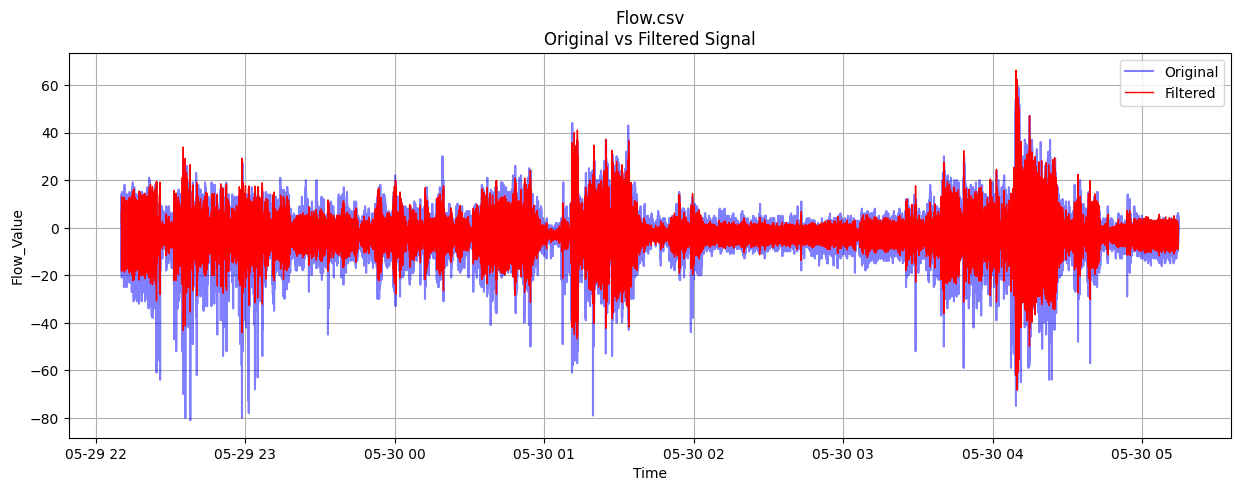

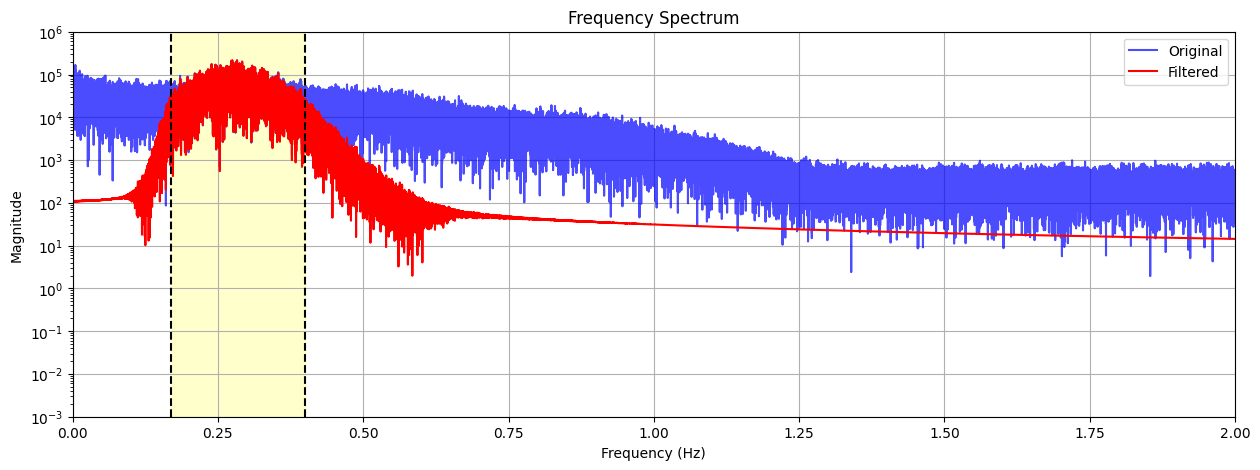


Processing Flow_Events.csv...
Skipping Flow_Events.csv - not a time series signal file

Processing SPO2.csv...
Using default 32Hz sampling rate
Saved filtered data to /content/internship/Processed_Data/AP03/filtered_SPO2.csv
Original - Mean: 95.89, Std: 4.25
Filtered - Mean: 95.88, Std: 3.94


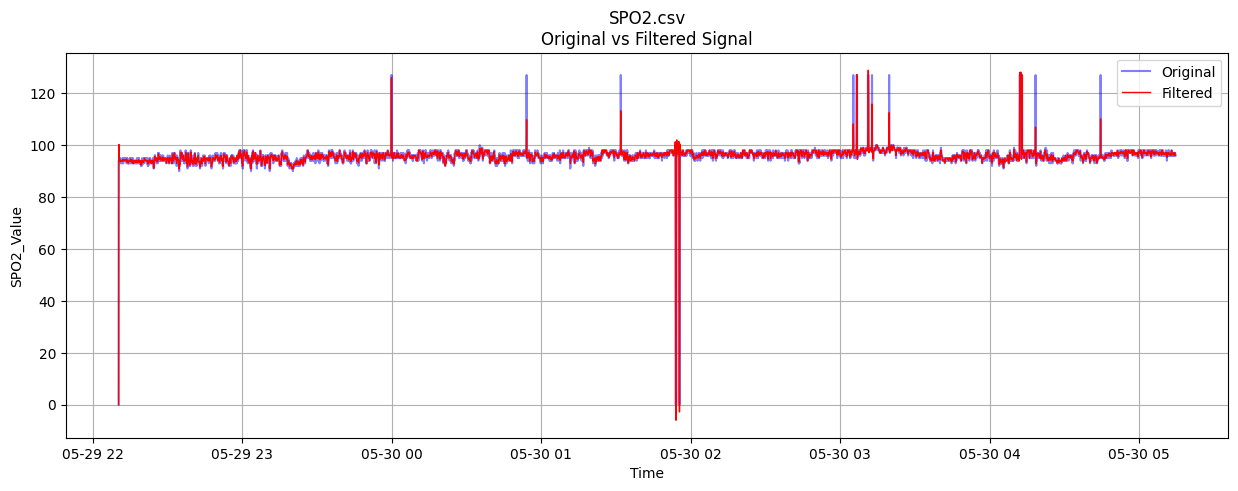


Processing Sleep_profile.csv...
Skipping Sleep_profile.csv - not a time series signal file

Processing Thorac.csv...
Using default 32Hz sampling rate
Saved filtered data to /content/internship/Processed_Data/AP03/filtered_Thorac.csv
Original - Mean: 0.62, Std: 67.11
Filtered - Mean: 0.62, Std: 45.23


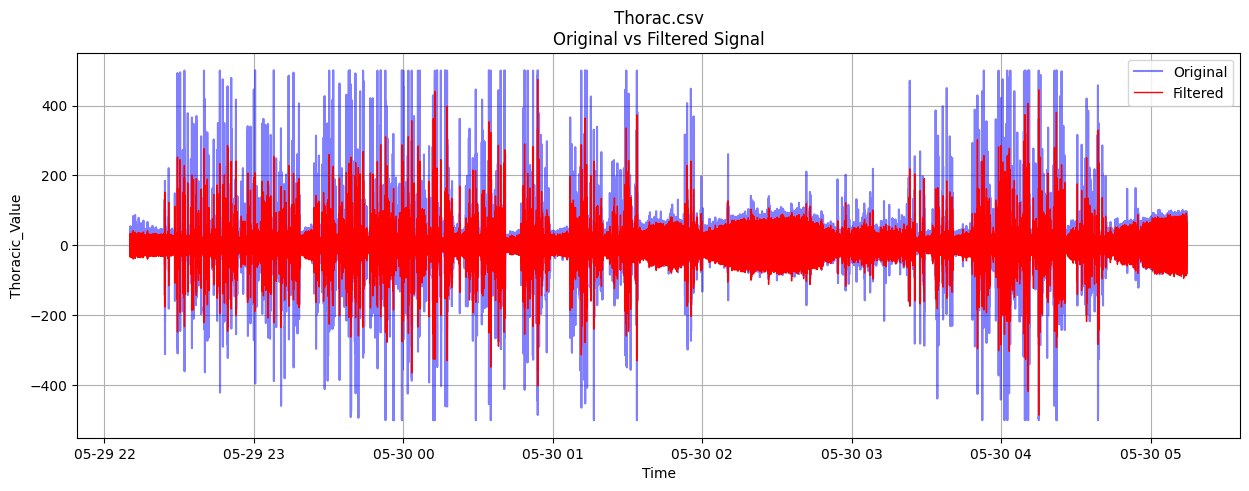

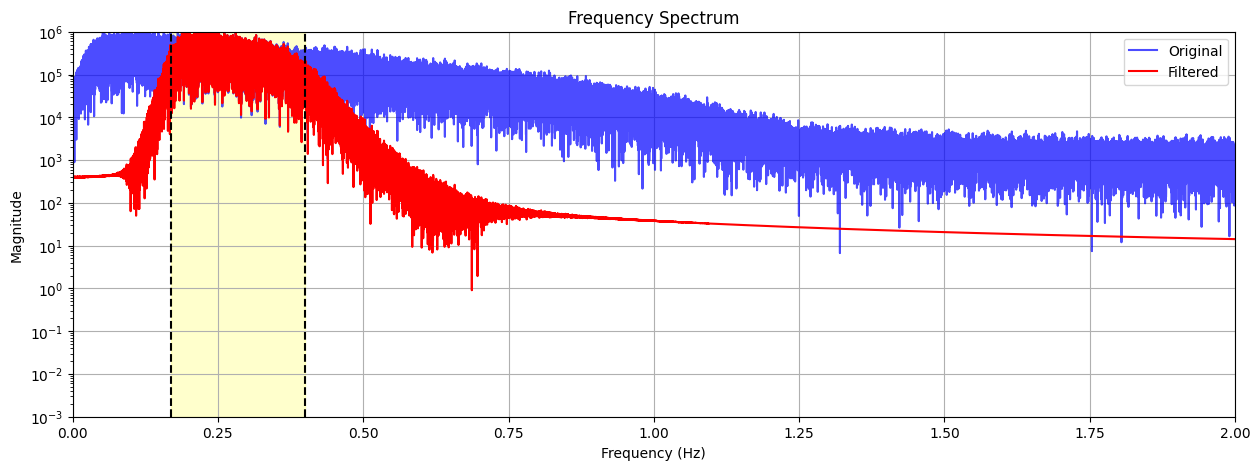

In [27]:
def clean_sleep_data(folder_path, show_plots=True):
    """
    Enhanced sleep study data cleaner with:
    - DC offset preservation
    - Signal-specific filtering
    - Output to filtered_data folder
    - Better timestamp handling
    """
    folder_path = Path(folder_path)

    if not folder_path.exists():
        print(f"Folder {folder_path} does not exist!")
        return

    # Create filtered_data directory if it doesn't exist
    filtered_dir = folder_path.parent / "AP03"
    filtered_dir.mkdir(exist_ok=True)

    print(f"Cleaning files in {folder_path}...")
    print(f"Filtered files will be saved to: {filtered_dir}")

    # Process each CSV file in the folder
    for csv_file in folder_path.glob('*.csv'):
        print(f"\nProcessing {csv_file.name}...")

        try:
            # Skip non-signal files
            if "Sleep_profile" in csv_file.name or "Flow_Events" in csv_file.name:
                print(f"Skipping {csv_file.name} - not a time series signal file")
                continue

            df = pd.read_csv(csv_file)

            # Handle timestamps - multiple fallback options
            if 'DateTime' in df.columns:
                df['DateTime'] = pd.to_datetime(df['DateTime'])
            elif 'Original_Timestamp' in df.columns:
                df['DateTime'] = pd.to_datetime(df['Original_Timestamp'],
                                              format='%d.%m.%Y %H:%M:%S,%f')
            elif 'Date' in df.columns and 'Time' in df.columns:
                df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
            else:
                print("No usable timestamp column found - skipping")
                continue

            # Get signal column
            signal_col = next((col for col in ['Flow_Value', 'SPO2_Value', 'Thoracic_Value']
                             if col in df.columns), None)

            if not signal_col:
                print("No signal data found - skipping")
                continue

            # Calculate sampling rate
            time_diffs = df['DateTime'].diff().dt.total_seconds().dropna()
            if len(time_diffs) == 0 or time_diffs.median() <= 0:
                fs = 32.0  # Default from file headers
                print("Using default 32Hz sampling rate")
            else:
                fs = 1 / time_diffs.median()
                print(f"Calculated sampling rate: {fs:.2f} Hz")

            # Signal-specific processing
            signal_data = df[signal_col].values
            dc_offset = np.mean(signal_data)

            if signal_col == 'SPO2_Value':
                # Gentle lowpass filtering for SPO2 (preserve trends)
                cutoff = 0.5  # Hz
                b, a = signal.butter(2, cutoff/(fs/2), btype='low')
                filtered = signal.filtfilt(b, a, signal_data - dc_offset) + dc_offset
            else:
                # Bandpass for respiratory signals
                low = 0.17  # 10 breaths/min
                high = 0.4   # 24 breaths/min
                b, a = signal.butter(4, [low/(fs/2), high/(fs/2)], btype='band')
                filtered = signal.filtfilt(b, a, signal_data - dc_offset) + dc_offset

            # Add filtered column
            df[f'Filtered_{signal_col}'] = filtered

            # Create new filename with prefix
            filtered_filename = f"filtered_{csv_file.stem}.csv"
            filtered_path = filtered_dir / filtered_filename

            # Save to new CSV in filtered_data folder
            df.to_csv(filtered_path, index=False)
            print(f"Saved filtered data to {filtered_path}")

            # Statistics
            print(f"Original - Mean: {dc_offset:.2f}, Std: {np.std(signal_data):.2f}")
            print(f"Filtered - Mean: {np.mean(filtered):.2f}, Std: {np.std(filtered):.2f}")

            if show_plots:
                # Time domain plot
                plt.figure(figsize=(15, 5))
                plt.plot(df['DateTime'], signal_data, 'b-', alpha=0.5, label='Original')
                plt.plot(df['DateTime'], filtered, 'r-', linewidth=1, label='Filtered')
                plt.title(f"{csv_file.name}\nOriginal vs Filtered Signal")
                plt.xlabel('Time')
                plt.ylabel(signal_col)
                plt.legend()
                plt.grid()
                plt.show()

                # Frequency domain plot (if filtered)
                if signal_col != 'SPO2_Value':
                    plt.figure(figsize=(15, 5))
                    n = len(signal_data)
                    freqs = np.fft.fftfreq(n, d=1/fs)[:n//2]

                    fft_orig = np.abs(np.fft.fft(signal_data)[:n//2])
                    fft_filt = np.abs(np.fft.fft(filtered)[:n//2])

                    plt.semilogy(freqs, fft_orig, 'b-', alpha=0.7, label='Original')
                    plt.semilogy(freqs, fft_filt, 'r-', label='Filtered')

                    # Mark breathing frequency range
                    plt.axvline(0.17, color='k', linestyle='--')
                    plt.axvline(0.4, color='k', linestyle='--')
                    plt.fill_betweenx([1e-3, 1e6], 0.17, 0.4, color='yellow', alpha=0.2)

                    plt.title("Frequency Spectrum")
                    plt.xlabel('Frequency (Hz)')
                    plt.ylabel('Magnitude')
                    plt.xlim(0, min(2, fs/2))
                    plt.ylim(1e-3, 1e6)
                    plt.legend()
                    plt.grid()
                    plt.show()

        except Exception as e:
            print(f"Error processing {csv_file.name}: {str(e)}")
            import traceback
            traceback.print_exc()

ap03_folder_path = "/content/internship/Processed_Data/AP03"
clean_sleep_data(ap03_folder_path, show_plots=True)

#AP04 processing

In [28]:
def parse_and_convert_to_csv(folder_path):
    """
    Robust parser for sleep study data files with comprehensive error handling.
    Separates dates and times, handles all timestamp formats, and ensures clean output.
    """
    folder_path = Path(folder_path)

    if not folder_path.exists():
        print(f"Folder {folder_path} does not exist!")
        return

    print(f"Processing files in {folder_path}...")

    def parse_timestamp(timestamp_str, reference_date=None):
        """Flexible timestamp parser that handles both full and time-only formats"""
        try:
            # Try parsing as full timestamp (date + time)
            if ',' in timestamp_str:
                dt_part, ms_part = timestamp_str.split(',')
                dt_obj = datetime.strptime(dt_part, '%d.%m.%Y %H:%M:%S')
            else:
                dt_obj = datetime.strptime(timestamp_str, '%d.%m.%Y %H:%M:%S')
            return dt_obj.date(), dt_obj.time(), dt_obj, timestamp_str
        except ValueError:
            # If that fails, try parsing as time-only (for Flow_Events end times)
            try:
                time_part = timestamp_str.split(',')[0] if ',' in timestamp_str else timestamp_str
                time_obj = datetime.strptime(time_part, '%H:%M:%S').time()

                if reference_date:
                    # Combine with reference date from start time
                    dt_obj = datetime.combine(reference_date, time_obj)
                    return reference_date, time_obj, dt_obj, timestamp_str
                return None, time_obj, None, timestamp_str
            except ValueError as e:
                print(f"Could not parse timestamp {timestamp_str}: {str(e)}")
                return None, None, None, timestamp_str

    # Process each file in the folder
    for file in folder_path.glob('*.txt'):
        print(f"\nProcessing {file.name}...")

        try:
            # Read the file
            with open(file, 'r') as f:
                lines = f.readlines()

            # Skip metadata lines (those without date/time patterns)
            data_lines = [line.strip() for line in lines if re.search(r'(\d{2}\.\d{2}\.\d{4}|\d{2}:\d{2}:\d{2})', line)]

            # Determine the file type and parse accordingly
            if "Flow_Events" in file.name:
                # Parse Flow_Events.txt - event data with start-end times
                data = []
                for line in data_lines:
                    parts = line.split(';')
                    if len(parts) >= 3:
                        time_range = parts[0].strip()
                        duration = parts[1].strip()
                        event_type = parts[2].strip()
                        sleep_stage = parts[3].strip() if len(parts) > 3 else None

                        # Split time range into start and end times
                        start_time_str, end_time_str = time_range.split('-')

                        # Parse start time (has full date)
                        start_date, start_time, start_dt, start_orig = parse_timestamp(start_time_str.strip())

                        # Parse end time (time only - use date from start time)
                        _, end_time, end_dt, end_orig = parse_timestamp(end_time_str.strip(), start_date)

                        data.append({
                            'Start_Date': start_date,
                            'Start_Time': start_time,
                            'Start_DateTime': start_dt,
                            'End_Time': end_time,
                            'End_DateTime': end_dt,
                            'Duration_Seconds': duration,
                            'Event_Type': event_type,
                            'Sleep_Stage': sleep_stage,
                            'Original_Start': start_orig,
                            'Original_End': end_orig
                        })

                df = pd.DataFrame(data)

                # Clean up - remove any completely null columns
                df = df.dropna(axis=1, how='all')

            elif "Flow" in file.name and "Flow_Events" not in file.name:
                # Parse Flow.txt - time series data
                data = []
                for line in data_lines:
                    if ';' in line:
                        timestamp, value = line.split(';')
                        date, time_val, dt, orig = parse_timestamp(timestamp.strip())
                        data.append({
                            'Date': date,
                            'Time': time_val,
                            'DateTime': dt,
                            'Flow_Value': value.strip(),
                            'Original_Timestamp': orig
                        })

                df = pd.DataFrame(data)

            elif "Sleep_profile" in file.name:
                # Parse Sleep_profile.txt - sleep stage data
                data = []
                for line in data_lines:
                    if ';' in line:
                        timestamp, stage = line.split(';')
                        date, time_val, dt, orig = parse_timestamp(timestamp.strip())
                        data.append({
                            'Date': date,
                            'Time': time_val,
                            'DateTime': dt,
                            'Sleep_Stage': stage.strip(),
                            'Original_Timestamp': orig
                        })

                df = pd.DataFrame(data)

            elif "SPO2" in file.name:
                # Parse SPO2.txt - oxygen saturation data
                data = []
                for line in data_lines:
                    if ';' in line:
                        timestamp, value = line.split(';')
                        date, time_val, dt, orig = parse_timestamp(timestamp.strip())
                        data.append({
                            'Date': date,
                            'Time': time_val,
                            'DateTime': dt,
                            'SPO2_Value': value.strip(),
                            'Original_Timestamp': orig
                        })

                df = pd.DataFrame(data)

            elif "Thorac" in file.name:
                # Parse Thorac.txt - thoracic movement data
                data = []
                for line in data_lines:
                    if ';' in line:
                        timestamp, value = line.split(';')
                        date, time_val, dt, orig = parse_timestamp(timestamp.strip())
                        data.append({
                            'Date': date,
                            'Time': time_val,
                            'DateTime': dt,
                            'Thoracic_Value': value.strip(),
                            'Original_Timestamp': orig
                        })

                df = pd.DataFrame(data)
            else:
                print(f"Unknown file type: {file.name}")
                continue

            # Convert numeric columns where appropriate
            numeric_cols = ['Flow_Value', 'SPO2_Value', 'Thoracic_Value', 'Duration_Seconds']
            for col in numeric_cols:
                if col in df.columns:
                    df[col] = pd.to_numeric(df[col], errors='coerce')

            # Create CSV file
            csv_file = file.with_suffix('.csv')
            df.to_csv(csv_file, index=False)
            print(f"Successfully created {csv_file}")

            # Display summary
            print("\nData summary:")
            print(f"Rows: {len(df)}")
            print(f"Columns: {len(df.columns)}")
            print("Column types:")
            print(df.dtypes)
            print("\nSample data:")
            print(df.head())

        except Exception as e:
            print(f"Error processing {file.name}: {str(e)}")
            import traceback
            traceback.print_exc()

ap04_folder_path = "/content/internship/Processed_Data/AP04"
parse_and_convert_to_csv(ap04_folder_path)

Processing files in /content/internship/Processed_Data/AP04...

Processing Sleep_profile.txt...
Successfully created /content/internship/Processed_Data/AP04/Sleep_profile.csv

Data summary:
Rows: 967
Columns: 5
Column types:
Date                          object
Time                          object
DateTime              datetime64[ns]
Sleep_Stage                   object
Original_Timestamp            object
dtype: object

Sample data:
         Date      Time            DateTime Sleep_Stage  \
0  2024-05-29  21:25:30 2024-05-29 21:25:30           A   
1  2024-05-29  21:26:00 2024-05-29 21:26:00        Wake   
2  2024-05-29  21:26:30 2024-05-29 21:26:30        Wake   
3  2024-05-29  21:27:00 2024-05-29 21:27:00        Wake   
4  2024-05-29  21:27:30 2024-05-29 21:27:30        Wake   

        Original_Timestamp  
0  29.05.2024 21:25:30,000  
1  29.05.2024 21:26:00,000  
2  29.05.2024 21:26:30,000  
3  29.05.2024 21:27:00,000  
4  29.05.2024 21:27:30,000  

Processing SPO2.txt...
Successfu

Cleaning files in /content/internship/Processed_Data/AP04...
Filtered files will be saved to: /content/internship/Processed_Data/AP04

Processing Flow.csv...
Using default 32Hz sampling rate
Saved filtered data to /content/internship/Processed_Data/AP04/filtered_Flow.csv
Original - Mean: -0.22, Std: 50.54
Filtered - Mean: -0.22, Std: 47.08


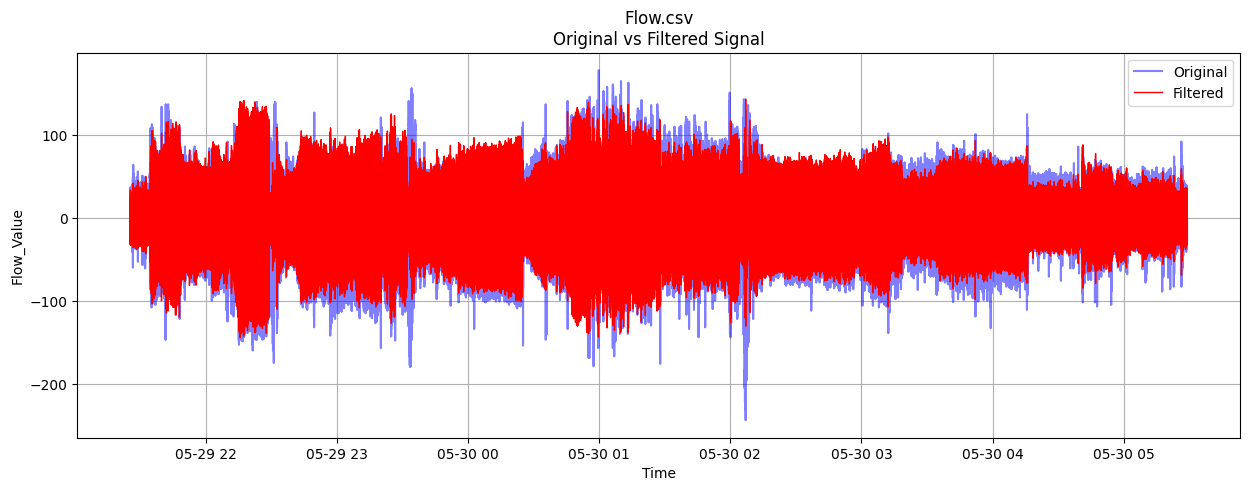

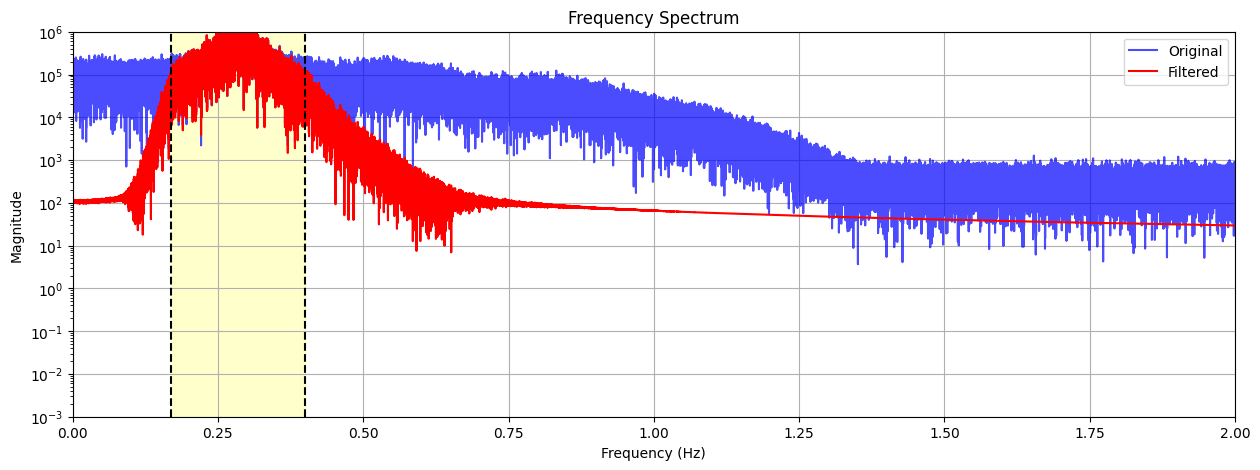


Processing Flow_Events.csv...
Skipping Flow_Events.csv - not a time series signal file

Processing SPO2.csv...
Using default 32Hz sampling rate
Saved filtered data to /content/internship/Processed_Data/AP04/filtered_SPO2.csv
Original - Mean: 90.63, Std: 2.85
Filtered - Mean: 90.63, Std: 2.61


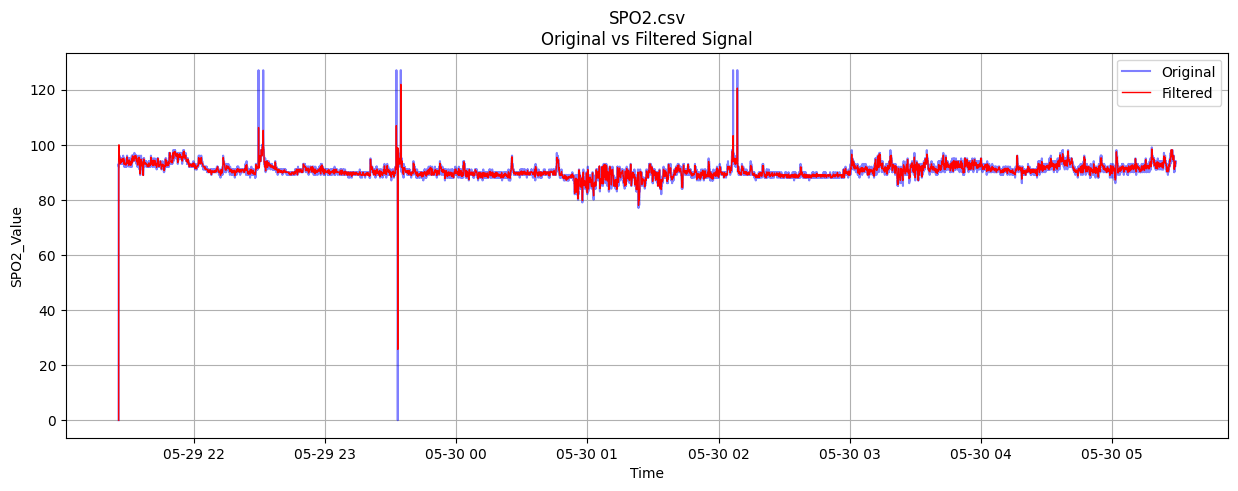


Processing Sleep_profile.csv...
Skipping Sleep_profile.csv - not a time series signal file

Processing Thorac.csv...
Using default 32Hz sampling rate
Saved filtered data to /content/internship/Processed_Data/AP04/filtered_Thorac.csv
Original - Mean: 3.44, Std: 71.65
Filtered - Mean: 3.44, Std: 52.61


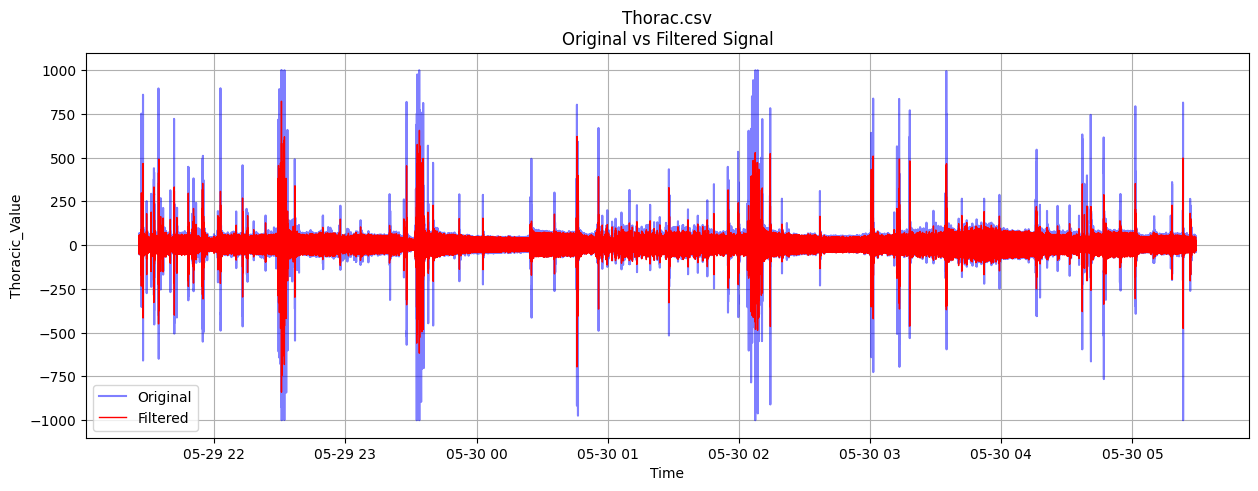

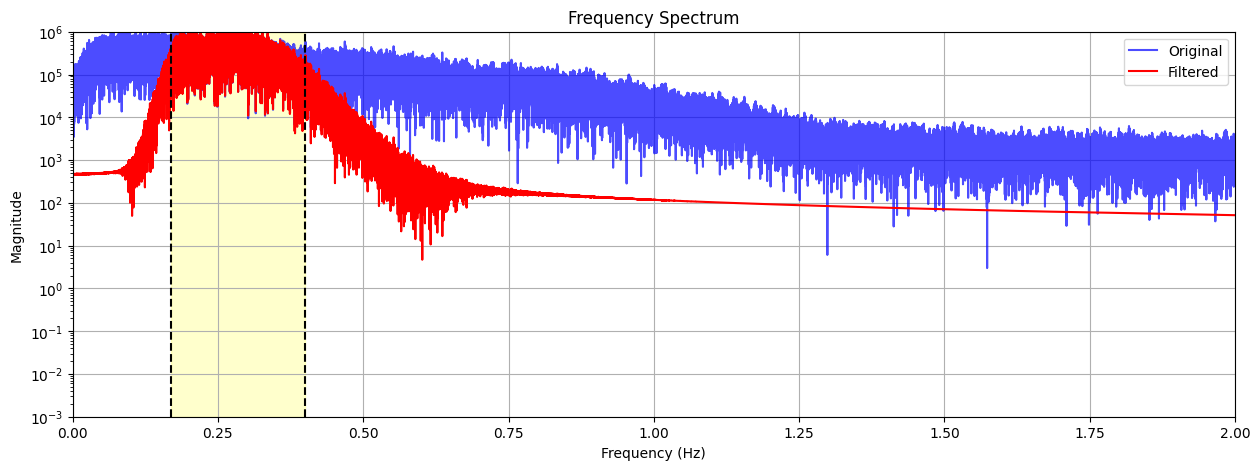

In [29]:
def clean_sleep_data(folder_path, show_plots=True):
    """
    Enhanced sleep study data cleaner with:
    - DC offset preservation
    - Signal-specific filtering
    - Output to filtered_data folder
    - Better timestamp handling
    """
    folder_path = Path(folder_path)

    if not folder_path.exists():
        print(f"Folder {folder_path} does not exist!")
        return

    # Create filtered_data directory if it doesn't exist
    filtered_dir = folder_path.parent / "AP04"
    filtered_dir.mkdir(exist_ok=True)

    print(f"Cleaning files in {folder_path}...")
    print(f"Filtered files will be saved to: {filtered_dir}")

    # Process each CSV file in the folder
    for csv_file in folder_path.glob('*.csv'):
        print(f"\nProcessing {csv_file.name}...")

        try:
            # Skip non-signal files
            if "Sleep_profile" in csv_file.name or "Flow_Events" in csv_file.name:
                print(f"Skipping {csv_file.name} - not a time series signal file")
                continue

            df = pd.read_csv(csv_file)

            # Handle timestamps - multiple fallback options
            if 'DateTime' in df.columns:
                df['DateTime'] = pd.to_datetime(df['DateTime'])
            elif 'Original_Timestamp' in df.columns:
                df['DateTime'] = pd.to_datetime(df['Original_Timestamp'],
                                              format='%d.%m.%Y %H:%M:%S,%f')
            elif 'Date' in df.columns and 'Time' in df.columns:
                df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
            else:
                print("No usable timestamp column found - skipping")
                continue

            # Get signal column
            signal_col = next((col for col in ['Flow_Value', 'SPO2_Value', 'Thoracic_Value']
                             if col in df.columns), None)

            if not signal_col:
                print("No signal data found - skipping")
                continue

            # Calculate sampling rate
            time_diffs = df['DateTime'].diff().dt.total_seconds().dropna()
            if len(time_diffs) == 0 or time_diffs.median() <= 0:
                fs = 32.0  # Default from file headers
                print("Using default 32Hz sampling rate")
            else:
                fs = 1 / time_diffs.median()
                print(f"Calculated sampling rate: {fs:.2f} Hz")

            # Signal-specific processing
            signal_data = df[signal_col].values
            dc_offset = np.mean(signal_data)

            if signal_col == 'SPO2_Value':
                # Gentle lowpass filtering for SPO2 (preserve trends)
                cutoff = 0.5  # Hz
                b, a = signal.butter(2, cutoff/(fs/2), btype='low')
                filtered = signal.filtfilt(b, a, signal_data - dc_offset) + dc_offset
            else:
                # Bandpass for respiratory signals
                low = 0.17  # 10 breaths/min
                high = 0.4   # 24 breaths/min
                b, a = signal.butter(4, [low/(fs/2), high/(fs/2)], btype='band')
                filtered = signal.filtfilt(b, a, signal_data - dc_offset) + dc_offset

            # Add filtered column
            df[f'Filtered_{signal_col}'] = filtered

            # Create new filename with prefix
            filtered_filename = f"filtered_{csv_file.stem}.csv"
            filtered_path = filtered_dir / filtered_filename

            # Save to new CSV in filtered_data folder
            df.to_csv(filtered_path, index=False)
            print(f"Saved filtered data to {filtered_path}")

            # Statistics
            print(f"Original - Mean: {dc_offset:.2f}, Std: {np.std(signal_data):.2f}")
            print(f"Filtered - Mean: {np.mean(filtered):.2f}, Std: {np.std(filtered):.2f}")

            if show_plots:
                # Time domain plot
                plt.figure(figsize=(15, 5))
                plt.plot(df['DateTime'], signal_data, 'b-', alpha=0.5, label='Original')
                plt.plot(df['DateTime'], filtered, 'r-', linewidth=1, label='Filtered')
                plt.title(f"{csv_file.name}\nOriginal vs Filtered Signal")
                plt.xlabel('Time')
                plt.ylabel(signal_col)
                plt.legend()
                plt.grid()
                plt.show()

                # Frequency domain plot (if filtered)
                if signal_col != 'SPO2_Value':
                    plt.figure(figsize=(15, 5))
                    n = len(signal_data)
                    freqs = np.fft.fftfreq(n, d=1/fs)[:n//2]

                    fft_orig = np.abs(np.fft.fft(signal_data)[:n//2])
                    fft_filt = np.abs(np.fft.fft(filtered)[:n//2])

                    plt.semilogy(freqs, fft_orig, 'b-', alpha=0.7, label='Original')
                    plt.semilogy(freqs, fft_filt, 'r-', label='Filtered')

                    # Mark breathing frequency range
                    plt.axvline(0.17, color='k', linestyle='--')
                    plt.axvline(0.4, color='k', linestyle='--')
                    plt.fill_betweenx([1e-3, 1e6], 0.17, 0.4, color='yellow', alpha=0.2)

                    plt.title("Frequency Spectrum")
                    plt.xlabel('Frequency (Hz)')
                    plt.ylabel('Magnitude')
                    plt.xlim(0, min(2, fs/2))
                    plt.ylim(1e-3, 1e6)
                    plt.legend()
                    plt.grid()
                    plt.show()

        except Exception as e:
            print(f"Error processing {csv_file.name}: {str(e)}")
            import traceback
            traceback.print_exc()

ap04_folder_path = "/content/internship/Processed_Data/AP04"
clean_sleep_data(ap04_folder_path, show_plots=True)

#AP05 processing

In [30]:
def parse_and_convert_to_csv(folder_path):
    """
    Robust parser for sleep study data files with comprehensive error handling.
    Separates dates and times, handles all timestamp formats, and ensures clean output.
    """
    folder_path = Path(folder_path)

    if not folder_path.exists():
        print(f"Folder {folder_path} does not exist!")
        return

    print(f"Processing files in {folder_path}...")

    def parse_timestamp(timestamp_str, reference_date=None):
        """Flexible timestamp parser that handles both full and time-only formats"""
        try:
            # Try parsing as full timestamp (date + time)
            if ',' in timestamp_str:
                dt_part, ms_part = timestamp_str.split(',')
                dt_obj = datetime.strptime(dt_part, '%d.%m.%Y %H:%M:%S')
            else:
                dt_obj = datetime.strptime(timestamp_str, '%d.%m.%Y %H:%M:%S')
            return dt_obj.date(), dt_obj.time(), dt_obj, timestamp_str
        except ValueError:
            # If that fails, try parsing as time-only (for Flow_Events end times)
            try:
                time_part = timestamp_str.split(',')[0] if ',' in timestamp_str else timestamp_str
                time_obj = datetime.strptime(time_part, '%H:%M:%S').time()

                if reference_date:
                    # Combine with reference date from start time
                    dt_obj = datetime.combine(reference_date, time_obj)
                    return reference_date, time_obj, dt_obj, timestamp_str
                return None, time_obj, None, timestamp_str
            except ValueError as e:
                print(f"Could not parse timestamp {timestamp_str}: {str(e)}")
                return None, None, None, timestamp_str

    # Process each file in the folder
    for file in folder_path.glob('*.txt'):
        print(f"\nProcessing {file.name}...")

        try:
            # Read the file
            with open(file, 'r') as f:
                lines = f.readlines()

            # Skip metadata lines (those without date/time patterns)
            data_lines = [line.strip() for line in lines if re.search(r'(\d{2}\.\d{2}\.\d{4}|\d{2}:\d{2}:\d{2})', line)]

            # Determine the file type and parse accordingly
            if "Flow_Events" in file.name:
                # Parse Flow_Events.txt - event data with start-end times
                data = []
                for line in data_lines:
                    parts = line.split(';')
                    if len(parts) >= 3:
                        time_range = parts[0].strip()
                        duration = parts[1].strip()
                        event_type = parts[2].strip()
                        sleep_stage = parts[3].strip() if len(parts) > 3 else None

                        # Split time range into start and end times
                        start_time_str, end_time_str = time_range.split('-')

                        # Parse start time (has full date)
                        start_date, start_time, start_dt, start_orig = parse_timestamp(start_time_str.strip())

                        # Parse end time (time only - use date from start time)
                        _, end_time, end_dt, end_orig = parse_timestamp(end_time_str.strip(), start_date)

                        data.append({
                            'Start_Date': start_date,
                            'Start_Time': start_time,
                            'Start_DateTime': start_dt,
                            'End_Time': end_time,
                            'End_DateTime': end_dt,
                            'Duration_Seconds': duration,
                            'Event_Type': event_type,
                            'Sleep_Stage': sleep_stage,
                            'Original_Start': start_orig,
                            'Original_End': end_orig
                        })

                df = pd.DataFrame(data)

                # Clean up - remove any completely null columns
                df = df.dropna(axis=1, how='all')

            elif "Flow" in file.name and "Flow_Events" not in file.name:
                # Parse Flow.txt - time series data
                data = []
                for line in data_lines:
                    if ';' in line:
                        timestamp, value = line.split(';')
                        date, time_val, dt, orig = parse_timestamp(timestamp.strip())
                        data.append({
                            'Date': date,
                            'Time': time_val,
                            'DateTime': dt,
                            'Flow_Value': value.strip(),
                            'Original_Timestamp': orig
                        })

                df = pd.DataFrame(data)

            elif "Sleep_profile" in file.name:
                # Parse Sleep_profile.txt - sleep stage data
                data = []
                for line in data_lines:
                    if ';' in line:
                        timestamp, stage = line.split(';')
                        date, time_val, dt, orig = parse_timestamp(timestamp.strip())
                        data.append({
                            'Date': date,
                            'Time': time_val,
                            'DateTime': dt,
                            'Sleep_Stage': stage.strip(),
                            'Original_Timestamp': orig
                        })

                df = pd.DataFrame(data)

            elif "SPO2" in file.name:
                # Parse SPO2.txt - oxygen saturation data
                data = []
                for line in data_lines:
                    if ';' in line:
                        timestamp, value = line.split(';')
                        date, time_val, dt, orig = parse_timestamp(timestamp.strip())
                        data.append({
                            'Date': date,
                            'Time': time_val,
                            'DateTime': dt,
                            'SPO2_Value': value.strip(),
                            'Original_Timestamp': orig
                        })

                df = pd.DataFrame(data)

            elif "Thorac" in file.name:
                # Parse Thorac.txt - thoracic movement data
                data = []
                for line in data_lines:
                    if ';' in line:
                        timestamp, value = line.split(';')
                        date, time_val, dt, orig = parse_timestamp(timestamp.strip())
                        data.append({
                            'Date': date,
                            'Time': time_val,
                            'DateTime': dt,
                            'Thoracic_Value': value.strip(),
                            'Original_Timestamp': orig
                        })

                df = pd.DataFrame(data)
            else:
                print(f"Unknown file type: {file.name}")
                continue

            # Convert numeric columns where appropriate
            numeric_cols = ['Flow_Value', 'SPO2_Value', 'Thoracic_Value', 'Duration_Seconds']
            for col in numeric_cols:
                if col in df.columns:
                    df[col] = pd.to_numeric(df[col], errors='coerce')

            # Create CSV file
            csv_file = file.with_suffix('.csv')
            df.to_csv(csv_file, index=False)
            print(f"Successfully created {csv_file}")

            # Display summary
            print("\nData summary:")
            print(f"Rows: {len(df)}")
            print(f"Columns: {len(df.columns)}")
            print("Column types:")
            print(df.dtypes)
            print("\nSample data:")
            print(df.head())

        except Exception as e:
            print(f"Error processing {file.name}: {str(e)}")
            import traceback
            traceback.print_exc()

ap05_folder_path = "/content/internship/Processed_Data/AP05"
parse_and_convert_to_csv(ap05_folder_path)

Processing files in /content/internship/Processed_Data/AP05...

Processing Sleep_profile.txt...
Successfully created /content/internship/Processed_Data/AP05/Sleep_profile.csv

Data summary:
Rows: 792
Columns: 5
Column types:
Date                          object
Time                          object
DateTime              datetime64[ns]
Sleep_Stage                   object
Original_Timestamp            object
dtype: object

Sample data:
         Date      Time            DateTime Sleep_Stage  \
0  2024-05-28  21:28:00 2024-05-28 21:28:00           A   
1  2024-05-28  21:28:30 2024-05-28 21:28:30        Wake   
2  2024-05-28  21:29:00 2024-05-28 21:29:00        Wake   
3  2024-05-28  21:29:30 2024-05-28 21:29:30        Wake   
4  2024-05-28  21:30:00 2024-05-28 21:30:00        Wake   

        Original_Timestamp  
0  28.05.2024 21:28:00,000  
1  28.05.2024 21:28:30,000  
2  28.05.2024 21:29:00,000  
3  28.05.2024 21:29:30,000  
4  28.05.2024 21:30:00,000  

Processing SPO2.txt...
Successfu

Cleaning files in /content/internship/Processed_Data/AP05...
Filtered files will be saved to: /content/internship/Processed_Data/AP05

Processing Flow.csv...
Using default 32Hz sampling rate
Saved filtered data to /content/internship/Processed_Data/AP05/filtered_Flow.csv
Original - Mean: -4.76, Std: 58.90
Filtered - Mean: -4.76, Std: 42.43


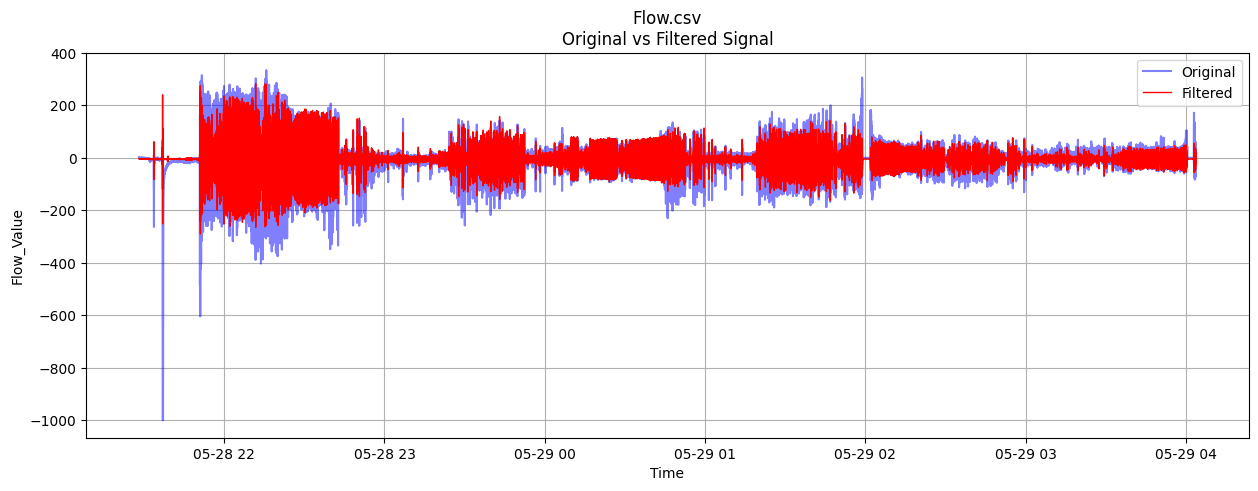

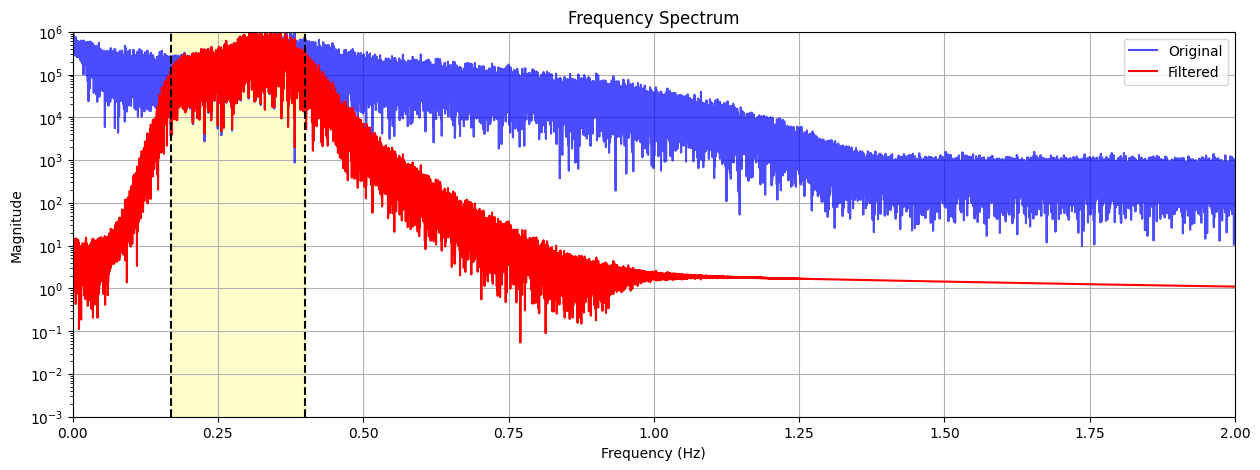


Processing Flow_Events.csv...
Skipping Flow_Events.csv - not a time series signal file

Processing SPO2.csv...
Using default 32Hz sampling rate
Saved filtered data to /content/internship/Processed_Data/AP05/filtered_SPO2.csv
Original - Mean: 92.20, Std: 17.26
Filtered - Mean: 92.20, Std: 17.12


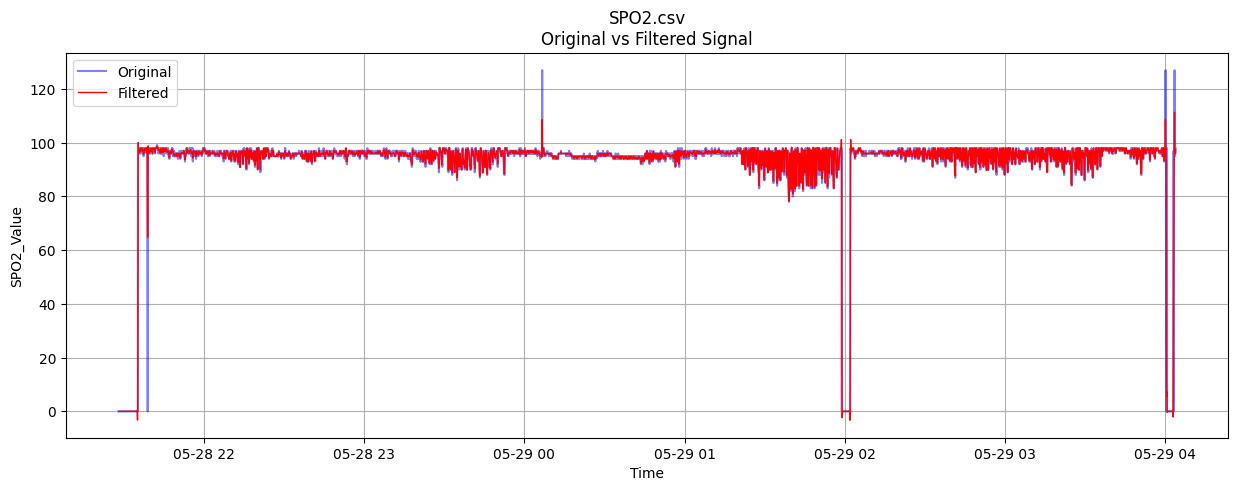


Processing Sleep_profile.csv...
Skipping Sleep_profile.csv - not a time series signal file

Processing Thorac.csv...
Using default 32Hz sampling rate
Saved filtered data to /content/internship/Processed_Data/AP05/filtered_Thorac.csv
Original - Mean: 2.69, Std: 53.34
Filtered - Mean: 2.69, Std: 32.19


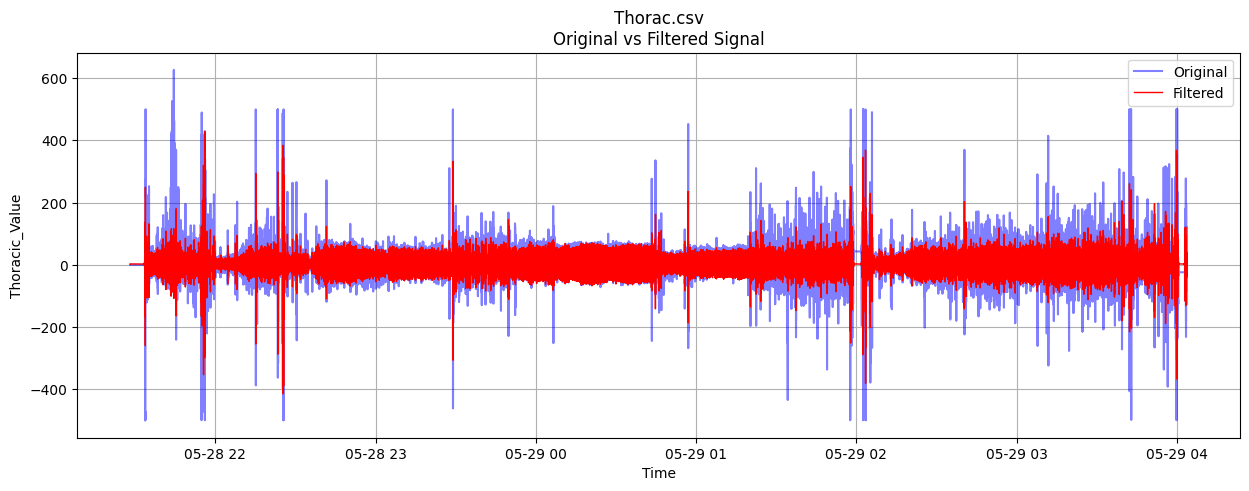

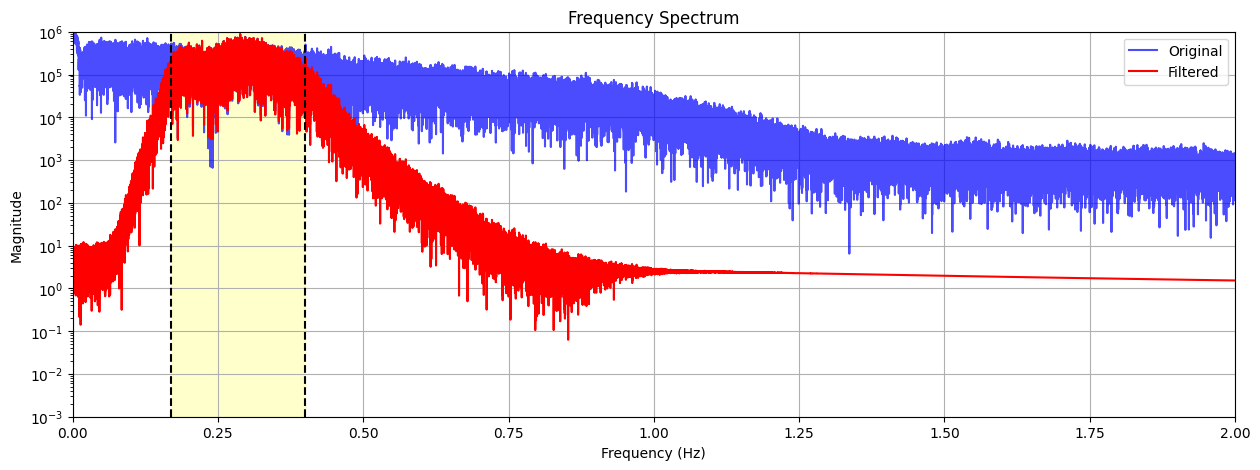

In [31]:
def clean_sleep_data(folder_path, show_plots=True):
    """
    Enhanced sleep study data cleaner with:
    - DC offset preservation
    - Signal-specific filtering
    - Output to filtered_data folder
    - Better timestamp handling
    """
    folder_path = Path(folder_path)

    if not folder_path.exists():
        print(f"Folder {folder_path} does not exist!")
        return

    # Create filtered_data directory if it doesn't exist
    filtered_dir = folder_path.parent / "AP05"
    filtered_dir.mkdir(exist_ok=True)

    print(f"Cleaning files in {folder_path}...")
    print(f"Filtered files will be saved to: {filtered_dir}")

    # Process each CSV file in the folder
    for csv_file in folder_path.glob('*.csv'):
        print(f"\nProcessing {csv_file.name}...")

        try:
            # Skip non-signal files
            if "Sleep_profile" in csv_file.name or "Flow_Events" in csv_file.name:
                print(f"Skipping {csv_file.name} - not a time series signal file")
                continue

            df = pd.read_csv(csv_file)

            # Handle timestamps - multiple fallback options
            if 'DateTime' in df.columns:
                df['DateTime'] = pd.to_datetime(df['DateTime'])
            elif 'Original_Timestamp' in df.columns:
                df['DateTime'] = pd.to_datetime(df['Original_Timestamp'],
                                              format='%d.%m.%Y %H:%M:%S,%f')
            elif 'Date' in df.columns and 'Time' in df.columns:
                df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
            else:
                print("No usable timestamp column found - skipping")
                continue

            # Get signal column
            signal_col = next((col for col in ['Flow_Value', 'SPO2_Value', 'Thoracic_Value']
                             if col in df.columns), None)

            if not signal_col:
                print("No signal data found - skipping")
                continue

            # Calculate sampling rate
            time_diffs = df['DateTime'].diff().dt.total_seconds().dropna()
            if len(time_diffs) == 0 or time_diffs.median() <= 0:
                fs = 32.0  # Default from file headers
                print("Using default 32Hz sampling rate")
            else:
                fs = 1 / time_diffs.median()
                print(f"Calculated sampling rate: {fs:.2f} Hz")

            # Signal-specific processing
            signal_data = df[signal_col].values
            dc_offset = np.mean(signal_data)

            if signal_col == 'SPO2_Value':
                # Gentle lowpass filtering for SPO2 (preserve trends)
                cutoff = 0.5  # Hz
                b, a = signal.butter(2, cutoff/(fs/2), btype='low')
                filtered = signal.filtfilt(b, a, signal_data - dc_offset) + dc_offset
            else:
                # Bandpass for respiratory signals
                low = 0.17  # 10 breaths/min
                high = 0.4   # 24 breaths/min
                b, a = signal.butter(4, [low/(fs/2), high/(fs/2)], btype='band')
                filtered = signal.filtfilt(b, a, signal_data - dc_offset) + dc_offset

            # Add filtered column
            df[f'Filtered_{signal_col}'] = filtered

            # Create new filename with prefix
            filtered_filename = f"filtered_{csv_file.stem}.csv"
            filtered_path = filtered_dir / filtered_filename

            # Save to new CSV in filtered_data folder
            df.to_csv(filtered_path, index=False)
            print(f"Saved filtered data to {filtered_path}")

            # Statistics
            print(f"Original - Mean: {dc_offset:.2f}, Std: {np.std(signal_data):.2f}")
            print(f"Filtered - Mean: {np.mean(filtered):.2f}, Std: {np.std(filtered):.2f}")

            if show_plots:
                # Time domain plot
                plt.figure(figsize=(15, 5))
                plt.plot(df['DateTime'], signal_data, 'b-', alpha=0.5, label='Original')
                plt.plot(df['DateTime'], filtered, 'r-', linewidth=1, label='Filtered')
                plt.title(f"{csv_file.name}\nOriginal vs Filtered Signal")
                plt.xlabel('Time')
                plt.ylabel(signal_col)
                plt.legend()
                plt.grid()
                plt.show()

                # Frequency domain plot (if filtered)
                if signal_col != 'SPO2_Value':
                    plt.figure(figsize=(15, 5))
                    n = len(signal_data)
                    freqs = np.fft.fftfreq(n, d=1/fs)[:n//2]

                    fft_orig = np.abs(np.fft.fft(signal_data)[:n//2])
                    fft_filt = np.abs(np.fft.fft(filtered)[:n//2])

                    plt.semilogy(freqs, fft_orig, 'b-', alpha=0.7, label='Original')
                    plt.semilogy(freqs, fft_filt, 'r-', label='Filtered')

                    # Mark breathing frequency range
                    plt.axvline(0.17, color='k', linestyle='--')
                    plt.axvline(0.4, color='k', linestyle='--')
                    plt.fill_betweenx([1e-3, 1e6], 0.17, 0.4, color='yellow', alpha=0.2)

                    plt.title("Frequency Spectrum")
                    plt.xlabel('Frequency (Hz)')
                    plt.ylabel('Magnitude')
                    plt.xlim(0, min(2, fs/2))
                    plt.ylim(1e-3, 1e6)
                    plt.legend()
                    plt.grid()
                    plt.show()

        except Exception as e:
            print(f"Error processing {csv_file.name}: {str(e)}")
            import traceback
            traceback.print_exc()

ap05_folder_path = "/content/internship/Processed_Data/AP05"
clean_sleep_data(ap05_folder_path, show_plots=True)

#Dataset Creation [8 Marks]


In [32]:
def create_datasets(processed_data_path):
    """
    Processes all subjects (AP01-AP05) with:
    - 30-second windows with 50% overlap (15s step)
    - Strict >50% overlap requirement for event labeling
    - Labels: Hypopnea, Obstructive Apnea, or Normal
    - Handles all data validation and error cases
    """
    processed_data_path = Path(processed_data_path)
    dataset_path = processed_data_path.parent / "Dataset"
    dataset_path.mkdir(exist_ok=True)

    # Initialize combined datasets
    all_breathing = []
    all_sleep_stages = []

    # Process each subject from AP01 to AP05
    for subject_id in [f"AP{i:02d}" for i in range(1, 6)]:
        subject_dir = processed_data_path / subject_id
        if not subject_dir.exists():
            print(f"\nSkipping {subject_id} - folder not found")
            continue

        print(f"\nProcessing {subject_id}...")
        try:
            # Load required files with validation
            def load_csv(file):
                path = subject_dir / file
                if not path.exists():
                    raise FileNotFoundError(f"Missing file: {path}")
                return pd.read_csv(path)

            flow_events = load_csv("Flow_Events.csv")
            flow = load_csv("filtered_Flow.csv")
            thorac = load_csv("filtered_Thorac.csv")
            sleep_profile = load_csv("Sleep_profile.csv")

            # Convert timestamps with error handling
            def convert_timestamps(df):
                if 'DateTime' in df.columns:
                    df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
                elif 'Original_Timestamp' in df.columns:
                    df['DateTime'] = pd.to_datetime(df['Original_Timestamp'],
                                                  format='%d.%m.%Y %H:%M:%S,%f',
                                                  errors='coerce')
                return df.dropna(subset=['DateTime'])

            flow = convert_timestamps(flow)
            thorac = convert_timestamps(thorac)
            sleep_profile = convert_timestamps(sleep_profile)

            # Process event timestamps
            flow_events['Start_DateTime'] = pd.to_datetime(
                flow_events['Start_Date'] + ' ' + flow_events['Start_Time'],
                format='%Y-%m-%d %H:%M:%S',
                errors='coerce'
            )
            flow_events['End_DateTime'] = pd.to_datetime(
                flow_events['Start_Date'] + ' ' + flow_events['End_Time'],
                format='%Y-%m-%d %H:%M:%S',
                errors='coerce'
            )
            flow_events = flow_events.dropna(subset=['Start_DateTime', 'End_DateTime'])

            # Fix dates for end times that cross midnight
            for i in flow_events.index:
                if flow_events.at[i, 'End_DateTime'] < flow_events.at[i, 'Start_DateTime']:
                    flow_events.at[i, 'End_DateTime'] += timedelta(days=1)

            # Create 30-second windows with 50% overlap (15s step)
            min_time = max(
                flow['DateTime'].min(),
                thorac['DateTime'].min(),
                sleep_profile['DateTime'].min()
            )
            max_time = min(
                flow['DateTime'].max(),
                thorac['DateTime'].max(),
                sleep_profile['DateTime'].max()
            )

            window_size = timedelta(seconds=30)
            step_size = timedelta(seconds=15)
            current_time = min_time

            # Initialize subject-specific data collectors
            subject_breathing = []
            subject_sleep_stages = []

            while current_time + window_size <= max_time:
                window_start = current_time
                window_end = current_time + window_size

                # Default to Normal label
                label = "Normal"
                max_overlap = 0

                # Find events overlapping with this window
                mask = (
                    (flow_events['Start_DateTime'] < window_end) &
                    (flow_events['End_DateTime'] > window_start)
                )
                overlapping_events = flow_events[mask]

                # Check for >50% overlap (15s) with any event
                for _, event in overlapping_events.iterrows():
                    overlap_start = max(window_start, event['Start_DateTime'])
                    overlap_end = min(window_end, event['End_DateTime'])
                    overlap_duration = (overlap_end - overlap_start).total_seconds()

                    if overlap_duration > 15 and overlap_duration > max_overlap:
                        max_overlap = overlap_duration
                        label = event['Event_Type']

                # Get signal data
                window_flow = flow[
                    (flow['DateTime'] >= window_start) &
                    (flow['DateTime'] < window_end)
                ]
                window_thorac = thorac[
                    (thorac['DateTime'] >= window_start) &
                    (thorac['DateTime'] < window_end)
                ]
                window_sleep = sleep_profile[
                    (sleep_profile['DateTime'] >= window_start) &
                    (sleep_profile['DateTime'] < window_end)
                ]

                # Only include complete windows
                if len(window_flow) > 0 and len(window_thorac) > 0:
                    sleep_stage = window_sleep['Sleep_Stage'].mode()[0] if len(window_sleep) > 0 else "Unknown"

                    subject_breathing.append({
                        'subject': subject_id,
                        'window_start': window_start,
                        'window_end': window_end,
                        'flow_mean': window_flow['Filtered_Flow_Value'].mean(),
                        'thoracic_mean': window_thorac['Filtered_Thoracic_Value'].mean(),
                        'label': label,
                        'sleep_stage': sleep_stage,
                        'overlap_seconds': max_overlap
                    })

                    subject_sleep_stages.append({
                        'subject': subject_id,
                        'window_start': window_start,
                        'window_end': window_end,
                        'sleep_stage': sleep_stage
                    })

                current_time += step_size

            # Add subject data to combined datasets
            if subject_breathing:
                all_breathing.extend(subject_breathing)
                all_sleep_stages.extend(subject_sleep_stages)
                print(f"Processed {len(subject_breathing)} windows for {subject_id}")
                print(f"Label distribution: {pd.Series([x['label'] for x in subject_breathing]).value_counts().to_dict()}")
            else:
                print(f"No valid windows created for {subject_id}")

        except Exception as e:
            print(f"Error processing {subject_id}: {str(e)}")
            continue

    # Save combined datasets
    if all_breathing:
        breathing_df = pd.DataFrame(all_breathing)
        sleep_stage_df = pd.DataFrame(all_sleep_stages)

        breathing_path = dataset_path / "combined_breathing_dataset.csv"
        sleep_stage_path = dataset_path / "combined_sleep_stage_dataset.csv"

        breathing_df.to_csv(breathing_path, index=False)
        sleep_stage_df.to_csv(sleep_stage_path, index=False)

        print("\nFinal Statistics:")
        print(f"Total subjects processed: {breathing_df['subject'].nunique()}")
        print(f"Total windows created: {len(breathing_df)}")
        print("\nLabel distribution across all subjects:")
        print(breathing_df['label'].value_counts())

        print(f"\nSaved combined datasets to:")
        print(f"- Breathing: {breathing_path}")
        print(f"- Sleep stages: {sleep_stage_path}")

        return breathing_df, sleep_stage_df
    else:
        print("\nNo valid data processed for any subject")
        return None, None

processed_data_path = "/content/internship/Processed_Data"
breathing_df, sleep_stage_df = create_datasets(processed_data_path)


Processing AP01...
Processed 1821 windows for AP01
Label distribution: {'Normal': 1737, 'Hypopnea': 72, 'Obstructive Apnea': 12}

Processing AP02...
Processed 1768 windows for AP02
Label distribution: {'Normal': 1626, 'Hypopnea': 139, 'Obstructive Apnea': 3}

Processing AP03...
Processed 1695 windows for AP03
Label distribution: {'Normal': 1680, 'Hypopnea': 14, 'Obstructive Apnea': 1}

Processing AP04...
Processed 1930 windows for AP04
Label distribution: {'Normal': 1781, 'Hypopnea': 146, 'Body event': 2, 'Obstructive Apnea': 1}

Processing AP05...
Processed 1580 windows for AP05
Label distribution: {'Normal': 1293, 'Hypopnea': 155, 'Obstructive Apnea': 129, 'Mixed Apnea': 2, 'Body event': 1}

Final Statistics:
Total subjects processed: 5
Total windows created: 8794

Label distribution across all subjects:
label
Normal               8117
Hypopnea              526
Obstructive Apnea     146
Body event              3
Mixed Apnea             2
Name: count, dtype: int64

Saved combined dat

In [33]:
!cp -r "/content/internship/Dataset" "/content/drive/MyDrive/IITG_assignments/internship"